<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1401-1450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6564]:

# Install RDKit.
%%capture
!pip install rdkit-pypi

In [6565]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [12:09:43] non-ring atom 1 marked aromatic


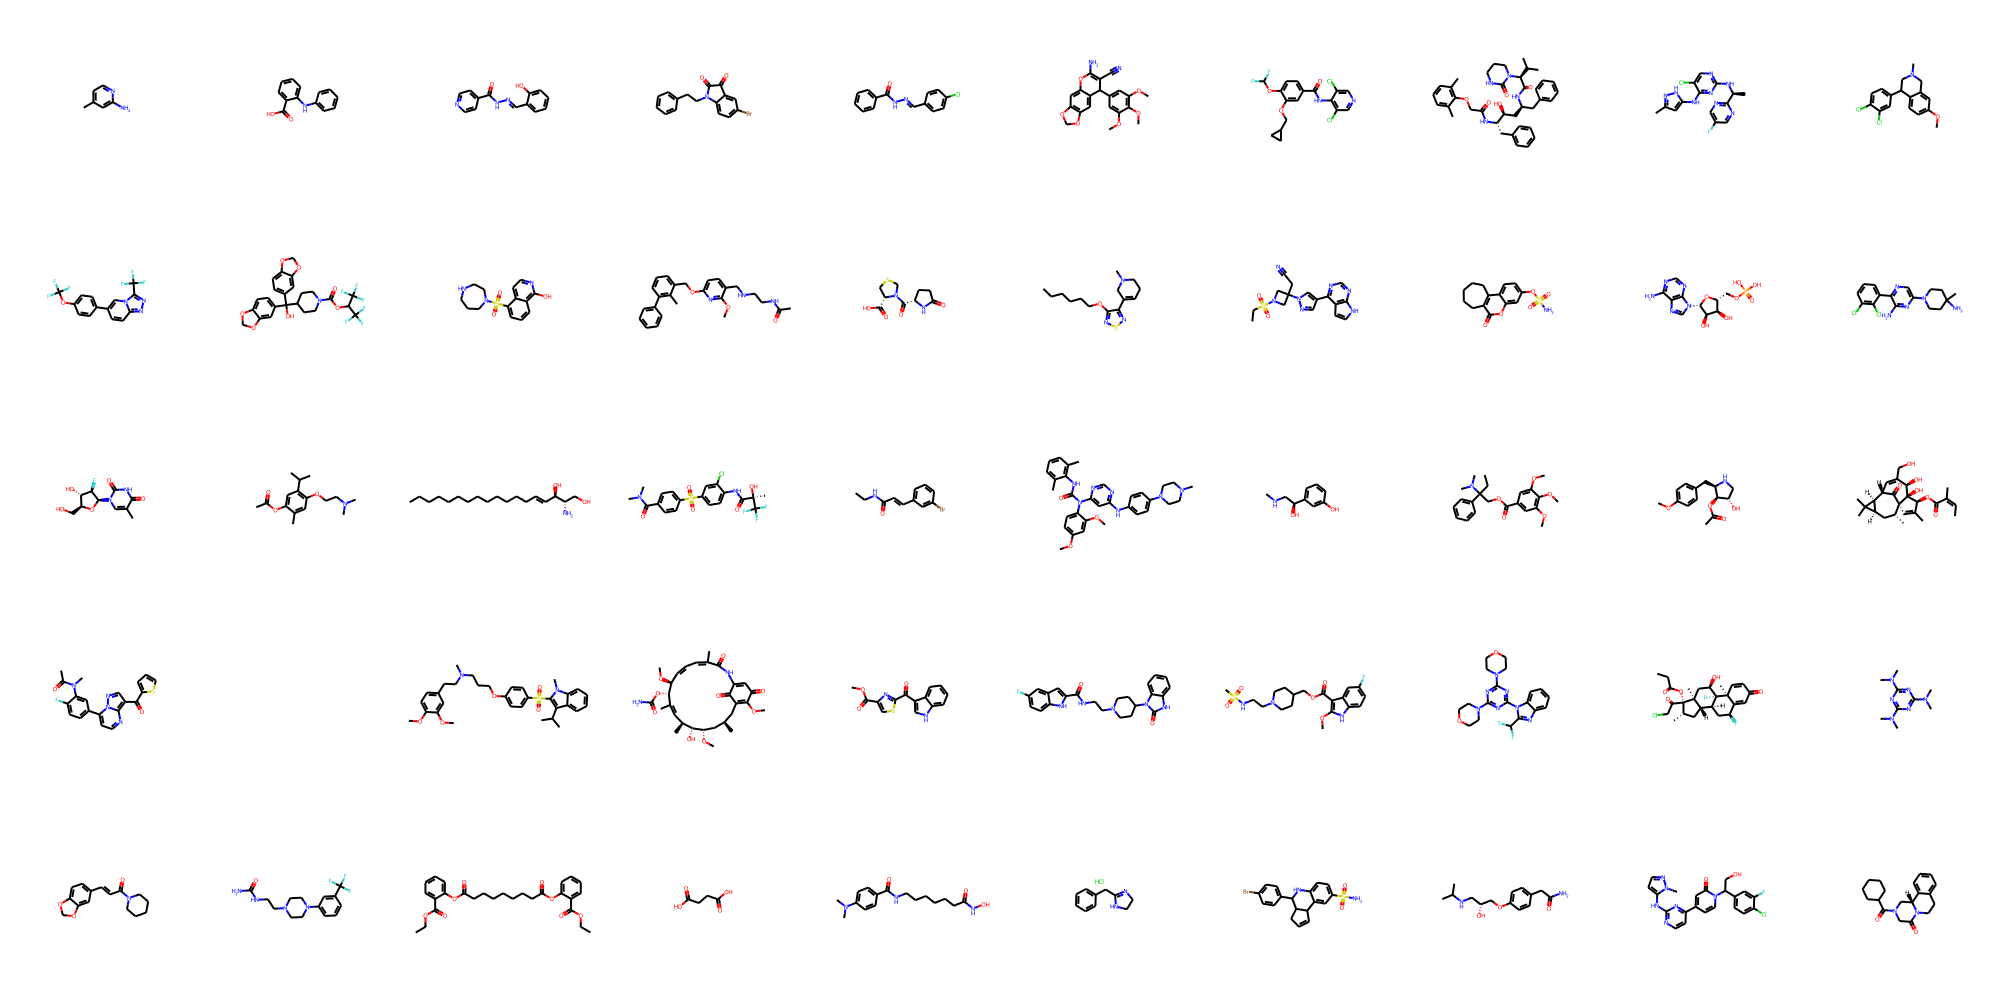

In [6566]:
smiles_list = [

'Cc1ccnc(N)c1',
'O=C(O)c1ccccc1Nc1ccccc1',
'O=C(N/N=C/c1ccccc1O)c1ccncc1',
'O=C1C(=O)N(CCc2ccccc2)c2ccc(Br)cc21',
'O=C(N/N=C/c1ccc(Cl)cc1)c1ccccc1',
'COc1cc(C2C(C#N)=C(N)Oc3cc4c(cc32)OCO4)cc(OC)c1OC',
'O=C(Nc1c(Cl)cncc1Cl)c1ccc(OC(F)F)c(OCC2CC2)c1',
'Cc1cccc(C)c1OCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C[C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)N1CCCNC1=O',
'Cc1cc(Nc2nc(N[C@@H](C)c3ncc(F)cn3)ncc2Cl)[nH]n1',
'COc1ccc2c(c1)CN(C)CC2c1ccc(Cl)c(Cl)c1',
'FC(F)(F)Oc1ccc(-c2ccc3nnc(C(F)(F)F)n3c2)cc1',
'O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(C(O)(c2ccc3c(c2)OCO3)c2ccc3c(c2)OCO3)CC1',
'O=S(=O)(c1cccc2c(O)nccc12)N1CCCNCC1',
'COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O',
'O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1',
'CCCCCCOc1nsnc1C1=CCCN(C)C1',
'CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)cn2)C1',
'NS(=O)(=O)Oc1ccc2c3c(c(=O)oc2c1)CCCCC3',
'Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]1O',
'CC1(N)CCN(c2cnc(-c3cccc(Cl)c3Cl)c(N)n2)CC1',
'Cc1cn([C@H]2O[C@@H](CO)[C@H](O)[C@H]2F)c(=O)[nH]c1=O',
'CC(=O)Oc1cc(C(C)C)c(OCCN(C)C)cc1C',
'CCCCCCCCCCCCC/C=C/[C@@H](O)[C@@H](N)CO',
'CN(C)C(=O)c1ccc(S(=O)(=O)c2ccc(NC(=O)[C@@](C)(O)C(F)(F)F)c(Cl)c2)cc1',
'CCNC(=O)/C=C/c1cccc(Br)c1',
'COc1ccc(N(C(=O)Nc2c(C)cccc2C)c2cc(Nc3ccc(N4CCN(C)CC4)cc3)ncn2)c(OC)c1',
'CNC[C@H](O)c1cccc(O)c1',
'CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C',
'COc1ccc(C[C@H]2NC[C@H](O)[C@H]2OC(C)=O)cc1',
'C/C=C(/C)C(=O)O[C@H]1C(C)=C[C@]23C(=O)[C@@H](C=C(CO)[C@@H](O)[C@]12O)[C@H]1[C@@H](C[C@H]3C)C1(C)C',
'CC(=O)N(C)c1cc(-c2ccnc3c(C(=O)c4cccs4)cnn23)ccc1F',
'No Data',
'COc1ccc(CCN(C)CCCOc2ccc(S(=O)(=O)c3c(C(C)C)c4ccccc4n3C)cc2)cc1OC',
'COC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C=C(\C)[C@H](OC(N)=O)[C@@H](OC)/C=C/C=C(\C)C(=O)NC(=CC1=O)C2=O',
'COC(=O)c1csc(C(=O)c2c[nH]c3ccccc23)n1',
'O=C(NCCN1CCC(n2c(=O)[nH]c3ccccc32)CC1)c1cc2cc(F)ccc2[nH]1',
'COc1[nH]c2ccc(F)cc2c1C(=O)OCC1CCN(CCNS(C)(=O)=O)CC1',
'FC(F)c1nc2ccccc2n1-c1nc(N2CCOCC2)nc(N2CCOCC2)n1',
'CCC(=O)O[C@@]1(C(=O)CCl)[C@@H](C)C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@]3(F)[C@H](O)C[C@@]21C',
'CN(C)c1nc(N(C)C)nc(N(C)C)n1',
'O=C(C=Cc1ccc2c(c1)OCO2)N1CCCCC1',
'NC(=O)NCCN1CCN(c2cccc(C(F)(F)F)c2)CC1',
'CCOC(=O)c1ccccc1OC(=O)CCCCCCCC(=O)Oc1ccccc1C(=O)OCC',
'O=C(O)CCC(=O)O',
'CN(C)c1ccc(C(=O)NCCCCCCC(=O)NO)cc1',
'Cl.c1ccc(CC2=NCCN2)cc1',
'NS(=O)(=O)c1ccc2c(c1)C1C=CCC1C(c1ccc(Br)cc1)N2',
'CC(C)NC[C@@H](O)COc1ccc(CC(N)=O)cc1',
'Cn1nccc1Nc1nccc(-c2ccn(C(CO)c3ccc(Cl)c(F)c3)c(=O)c2)n1',
'O=C(C1CCCCC1)N1CC(=O)N2CCc3ccccc3[C@H]2C1',
               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



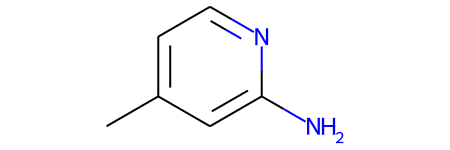

In [6567]:
M1 = mol_list [0]
M1

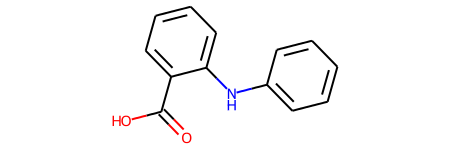

In [6568]:
M2 = mol_list [1]
M2

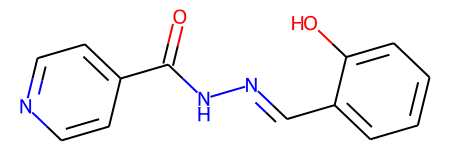

In [6569]:
M3 = mol_list [2]
M3

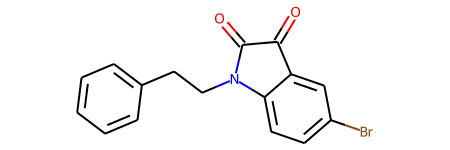

In [6570]:
M4 = mol_list [3]
M4

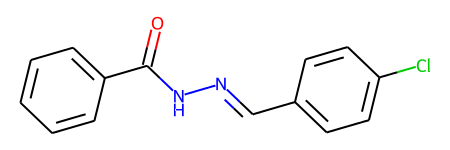

In [6571]:
M5 = mol_list [4]
M5

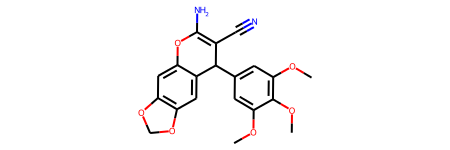

In [6572]:
M6 = mol_list [5]
M6

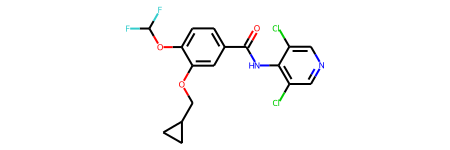

In [6573]:
M7 = mol_list [6]
M7

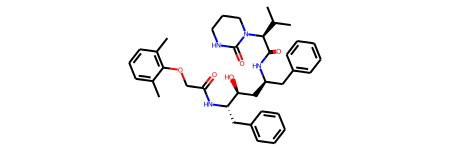

In [6574]:
M8 = mol_list [7]
M8

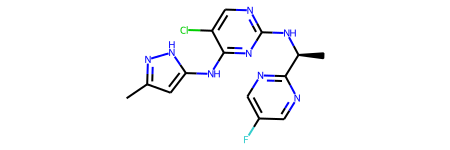

In [6575]:
M9 = mol_list [8]
M9

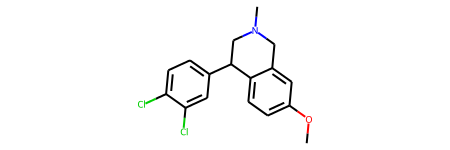

In [6576]:
M10 = mol_list [9]
M10

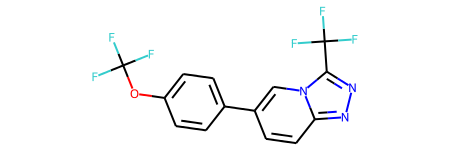

In [6577]:
M11 = mol_list [10]
M11

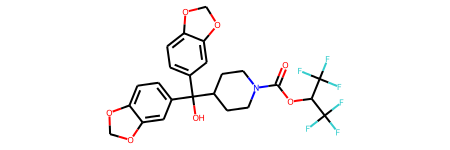

In [6578]:
M12 = mol_list [11]
M12

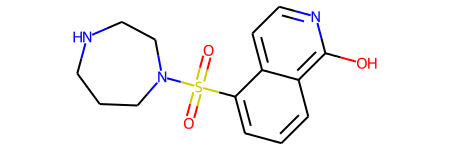

In [6579]:
M13 = mol_list [12]
M13

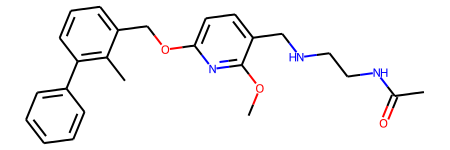

In [6580]:
M14 = mol_list [13]
M14

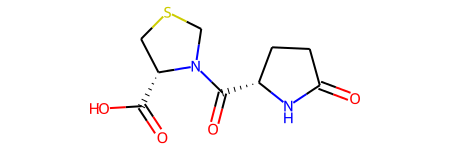

In [6581]:
M15 = mol_list [14]
M15

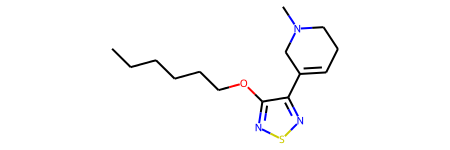

In [6582]:
M16 = mol_list [15]
M16

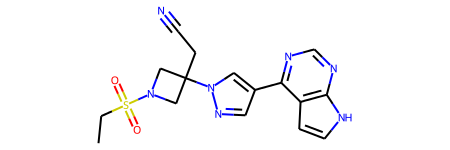

In [6583]:
M17 = mol_list [16]
M17

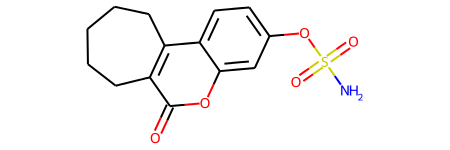

In [6584]:
M18 = mol_list [17]
M18

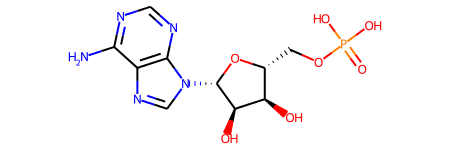

In [6585]:
M19 = mol_list [18]
M19

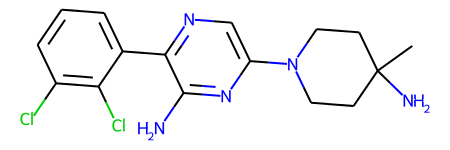

In [6586]:
M20 = mol_list [19]
M20

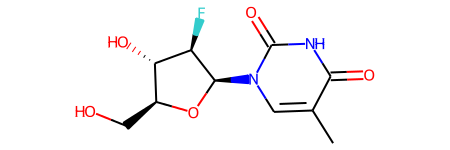

In [6587]:
M21 = mol_list [20]
M21

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


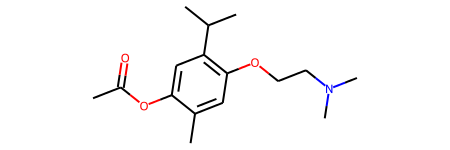

In [6588]:
M22 = mol_list [21]
M22

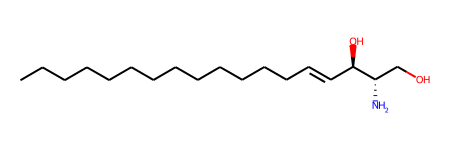

In [6589]:
M23 = mol_list [22]
M23

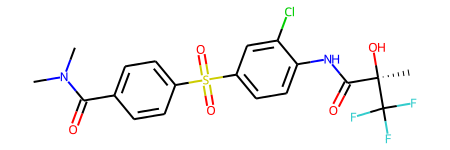

In [6590]:
M24 = mol_list [23]
M24

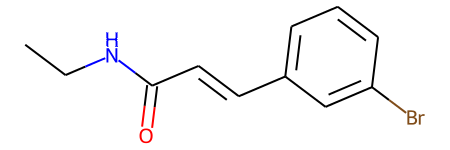

In [6591]:
M25 = mol_list [24]
M25

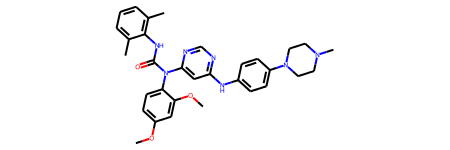

In [6592]:
M26 = mol_list [25]
M26

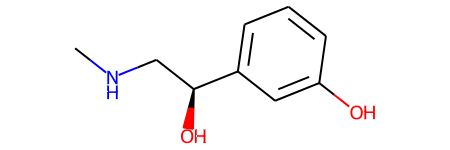

In [6593]:
M27 = mol_list [26]
M27

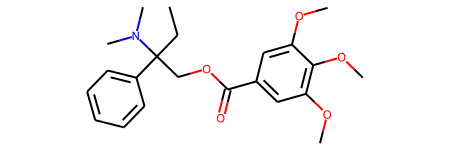

In [6594]:
M28 = mol_list [27]
M28

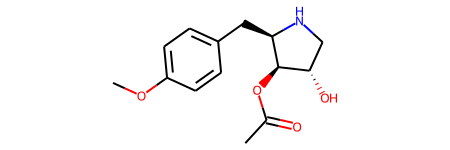

In [6595]:
M29 = mol_list [28]
M29

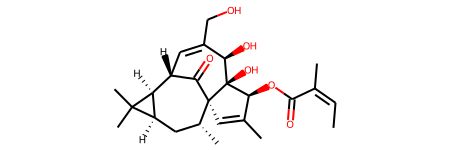

In [6596]:
M30 = mol_list [29]
M30

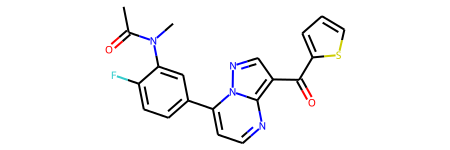

In [6597]:
M31 = mol_list [30]
M31

In [6598]:
M32 = mol_list [31]
M32

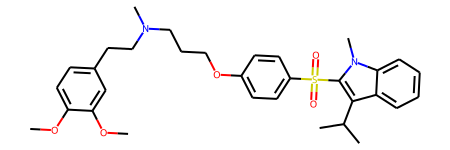

In [6599]:
M33 = mol_list [32]
M33

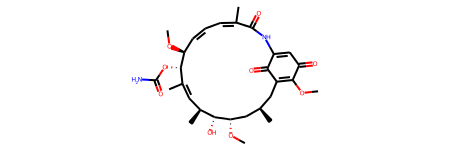

In [6600]:
M34 = mol_list [33]
M34

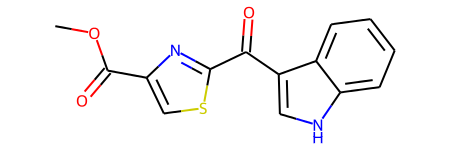

In [6601]:
M35 = mol_list [34]
M35

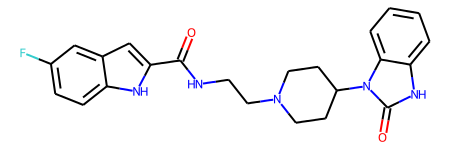

In [6602]:
M36 = mol_list [35]
M36

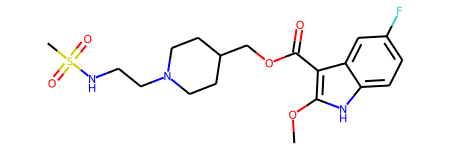

In [6603]:
M37= mol_list [36]
M37

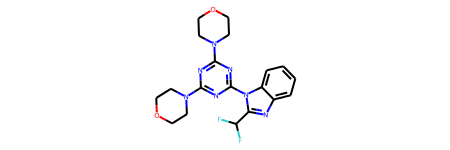

In [6604]:
M38= mol_list [37]
M38

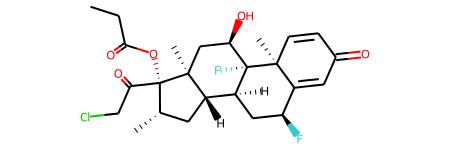

In [6605]:
M39= mol_list [38]
M39

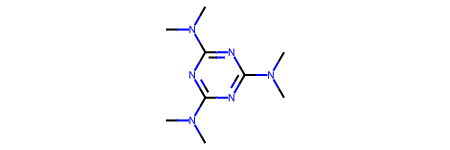

In [6606]:
M40= mol_list [39]
M40

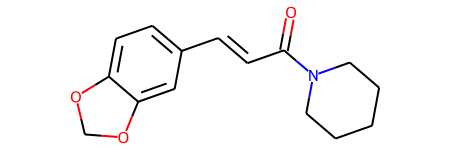

In [6607]:
M41= mol_list [40]
M41

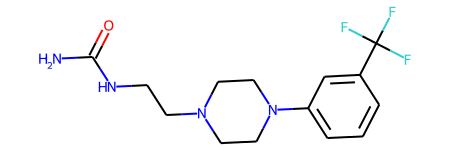

In [6608]:
M42= mol_list [41]
M42

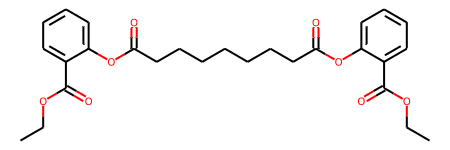

In [6609]:
M43= mol_list [42]
M43

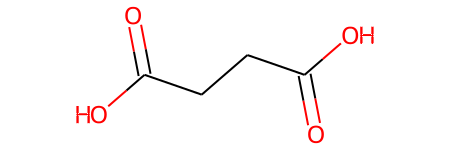

In [6610]:
M44= mol_list [43]
M44

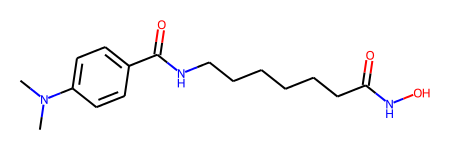

In [6611]:
M45= mol_list [44]
M45

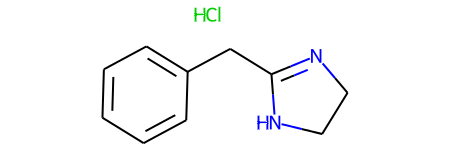

In [6612]:
M46= mol_list [45]
M46

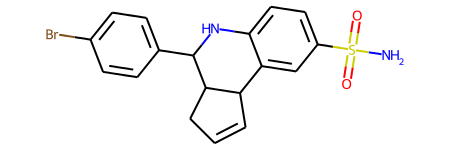

In [6613]:
M47= mol_list [46]
M47

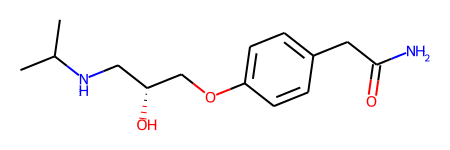

In [6614]:
M48= mol_list [47]
M48

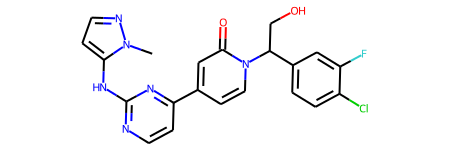

In [6615]:
M49= mol_list [48]
M49

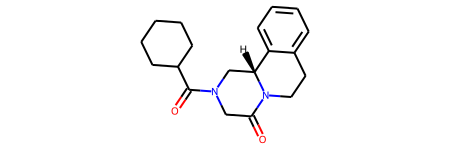

In [6616]:
M50= mol_list [49]
M50

In [6617]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 62,
 147,
 161,
 177,
 319,
 356,
 377,
 378,
 428,
 433,
 698,
 726,
 787,
 799,
 842,
 849,
 875,
 1013]

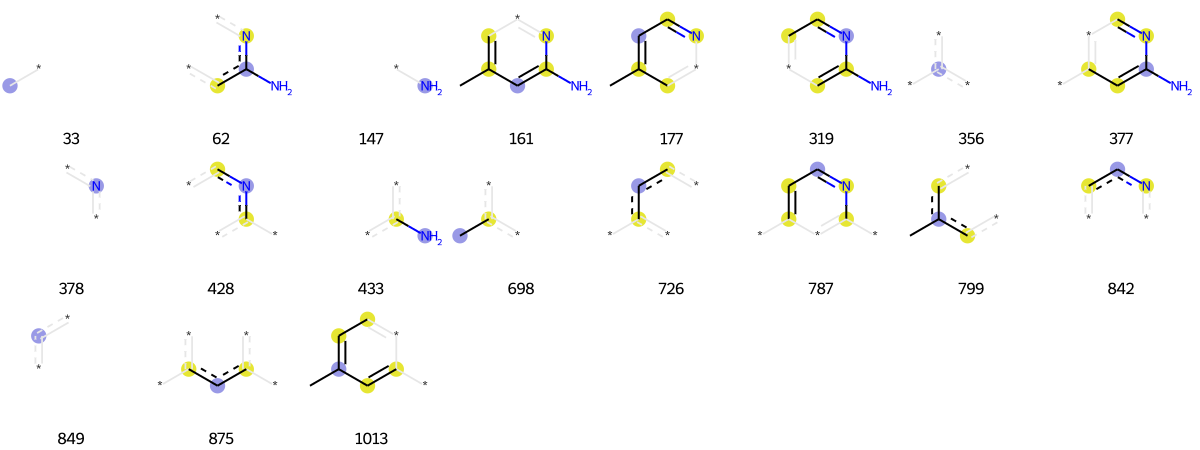

In [6618]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [6619]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[23,
 64,
 94,
 128,
 175,
 191,
 200,
 356,
 389,
 423,
 456,
 491,
 500,
 650,
 672,
 703,
 726,
 807,
 819,
 849,
 882,
 893,
 967]

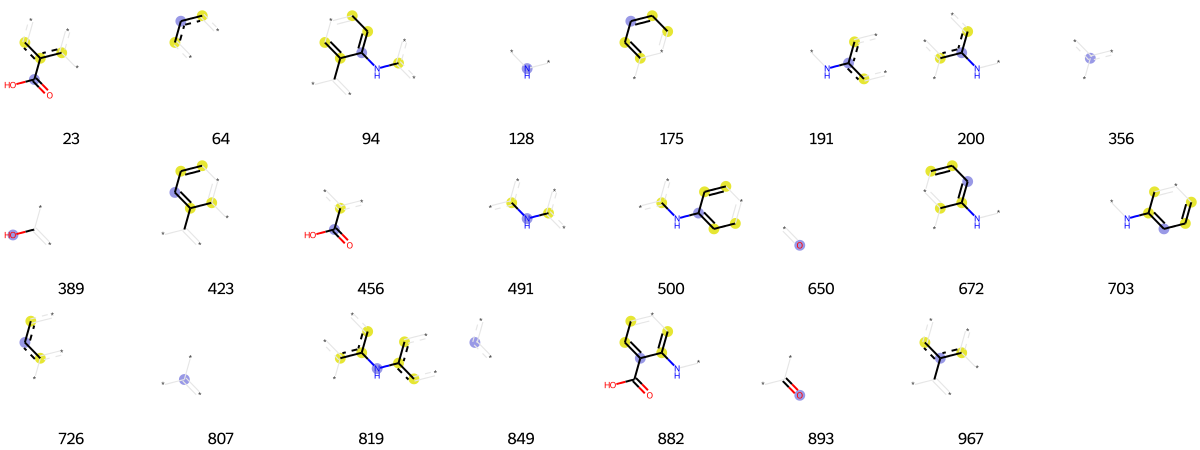

In [6620]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [6621]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[64,
 128,
 133,
 175,
 184,
 201,
 265,
 318,
 356,
 361,
 378,
 383,
 386,
 441,
 486,
 497,
 578,
 579,
 583,
 641,
 650,
 694,
 725,
 726,
 807,
 842,
 843,
 849,
 864,
 893,
 924,
 961,
 968]

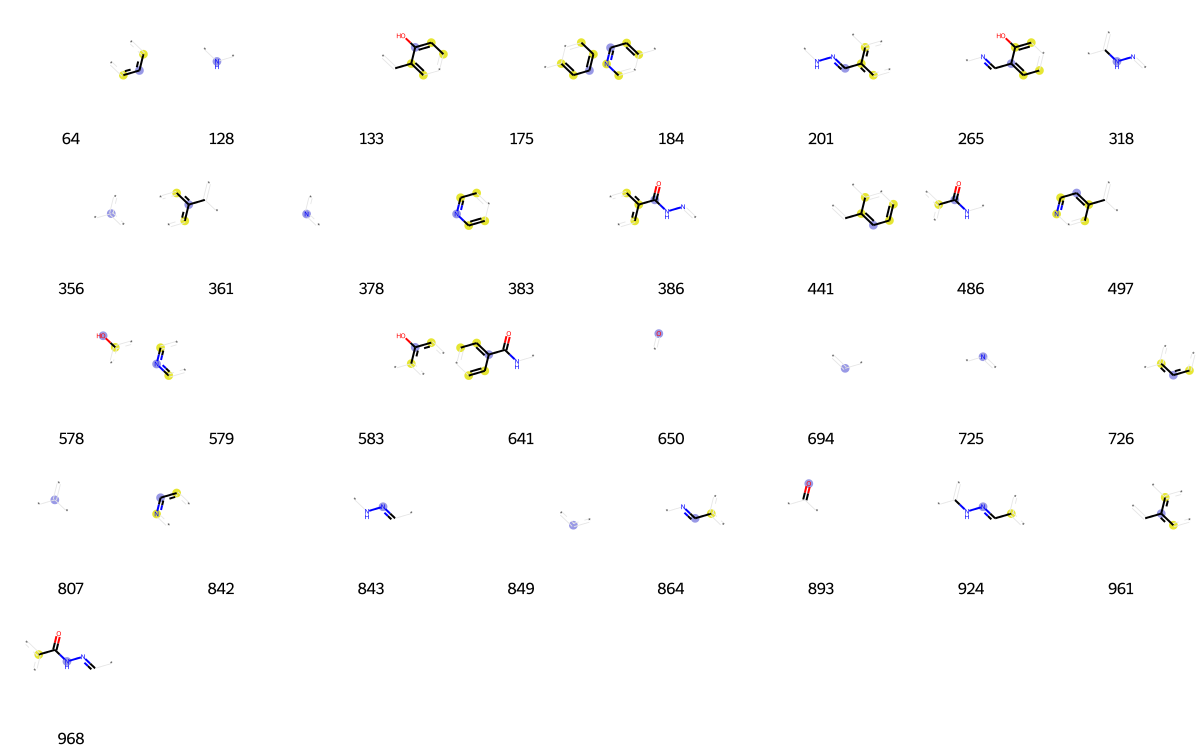

In [6622]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [6623]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[21,
 42,
 64,
 80,
 121,
 133,
 175,
 219,
 271,
 289,
 303,
 314,
 321,
 352,
 356,
 389,
 449,
 452,
 559,
 588,
 607,
 650,
 669,
 726,
 728,
 730,
 766,
 774,
 849,
 875,
 879,
 891,
 909,
 935,
 967]

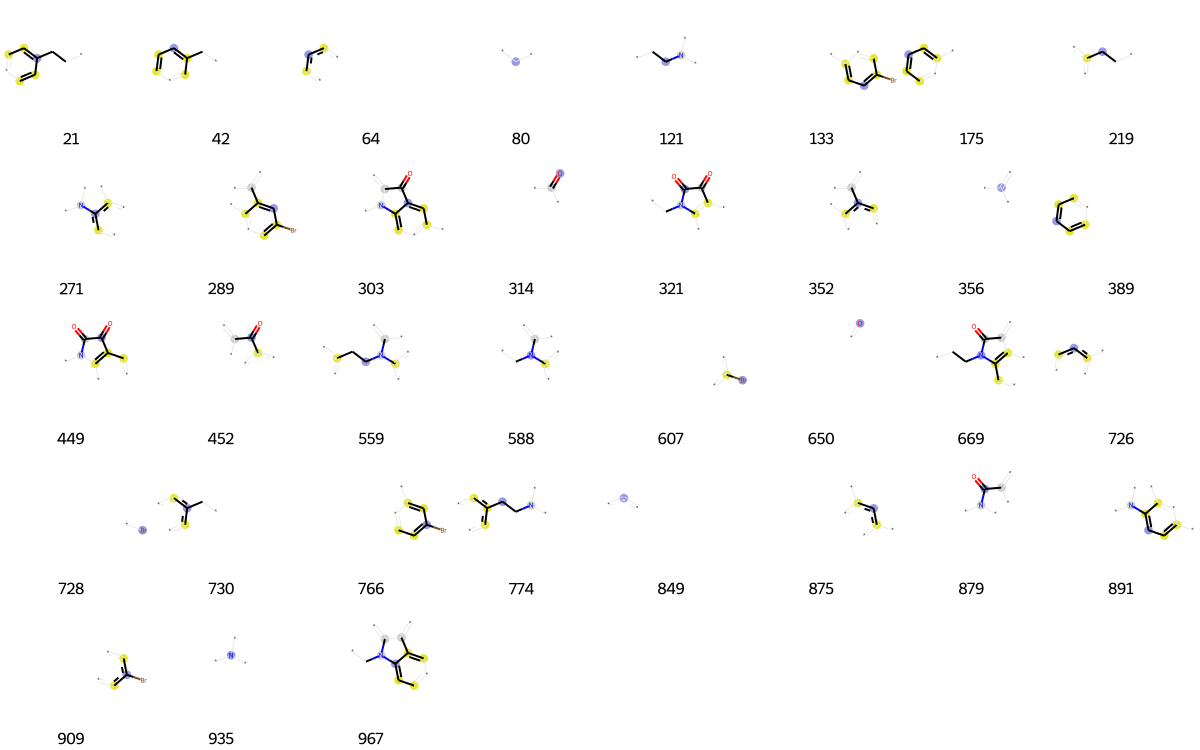

In [6624]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [6625]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[25,
 46,
 64,
 128,
 175,
 216,
 270,
 309,
 318,
 356,
 361,
 386,
 389,
 486,
 561,
 641,
 650,
 659,
 694,
 725,
 726,
 807,
 816,
 843,
 849,
 864,
 893,
 924,
 961,
 968,
 1009]

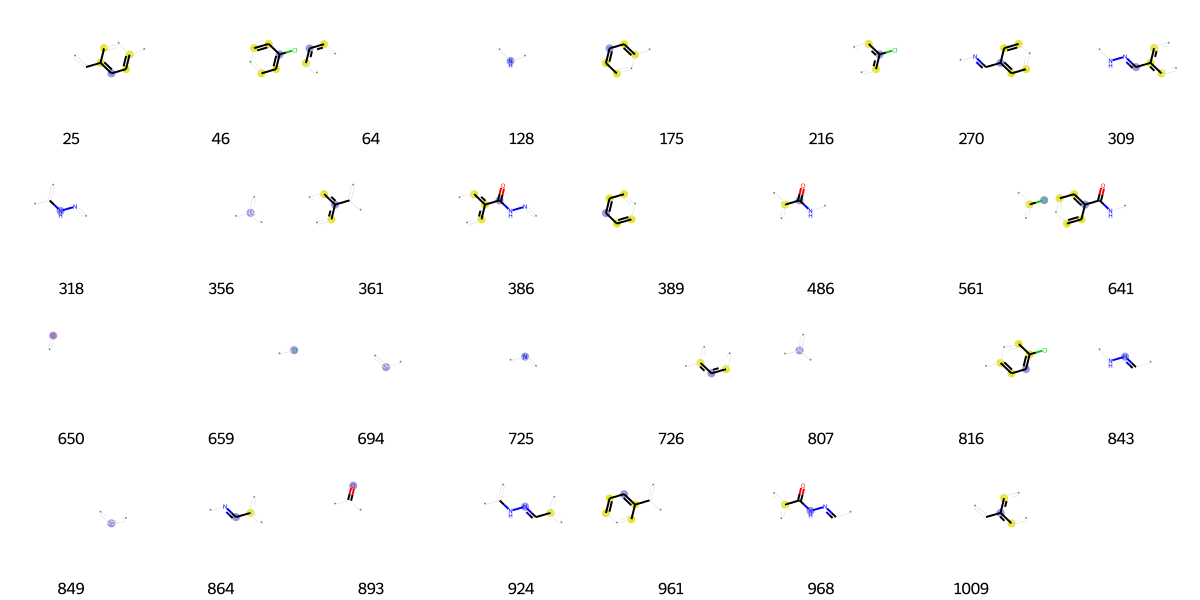

In [6626]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [6627]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[3,
 33,
 46,
 112,
 147,
 217,
 227,
 239,
 249,
 255,
 282,
 307,
 325,
 333,
 346,
 356,
 360,
 393,
 433,
 441,
 512,
 558,
 575,
 599,
 656,
 674,
 695,
 738,
 776,
 786,
 790,
 839,
 841,
 849,
 861,
 868,
 875,
 879,
 881,
 903,
 919,
 926,
 946,
 1019]

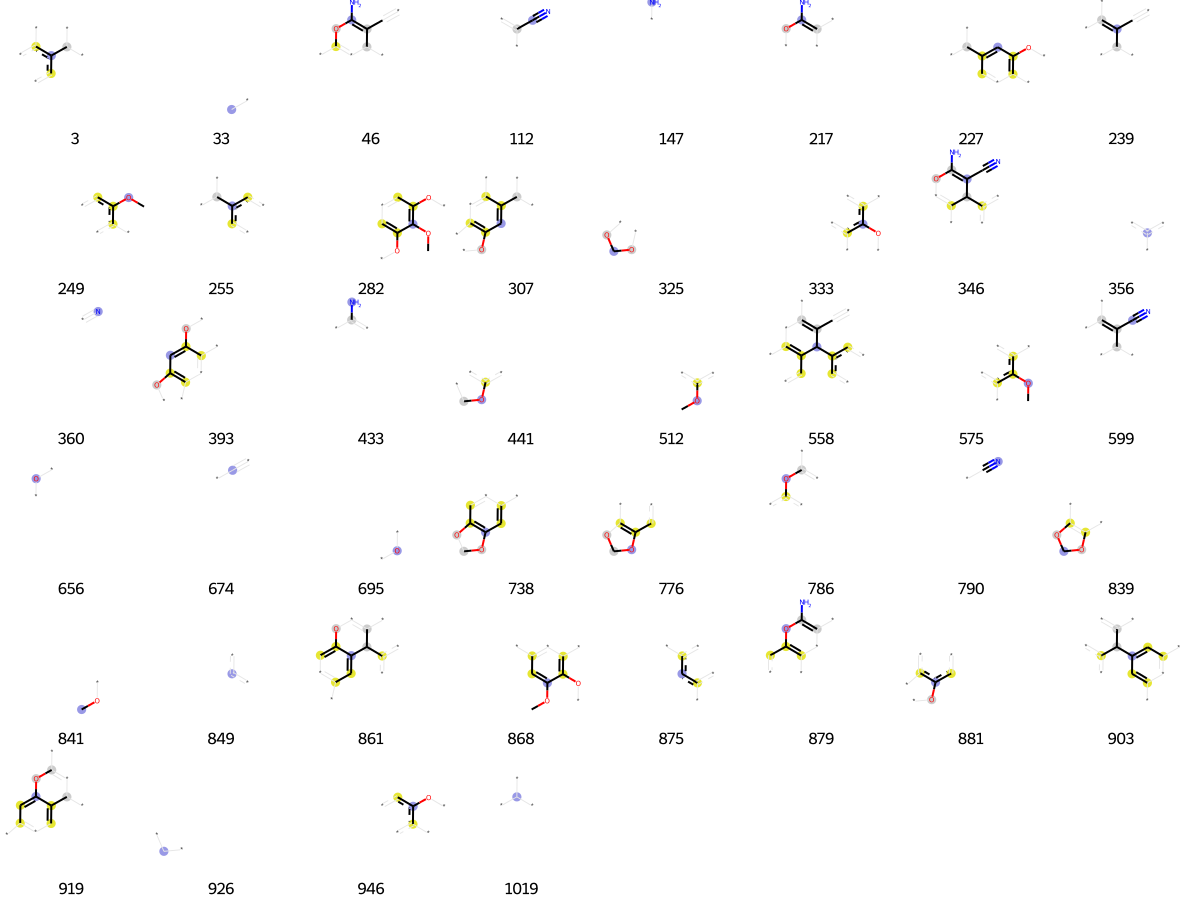

In [6628]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [6629]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 26,
 29,
 80,
 94,
 112,
 128,
 142,
 301,
 335,
 356,
 361,
 366,
 378,
 381,
 425,
 428,
 432,
 486,
 511,
 526,
 561,
 579,
 580,
 625,
 647,
 650,
 659,
 664,
 673,
 695,
 723,
 726,
 733,
 747,
 771,
 792,
 807,
 834,
 849,
 859,
 875,
 884,
 893,
 904,
 926,
 946,
 949,
 1019]

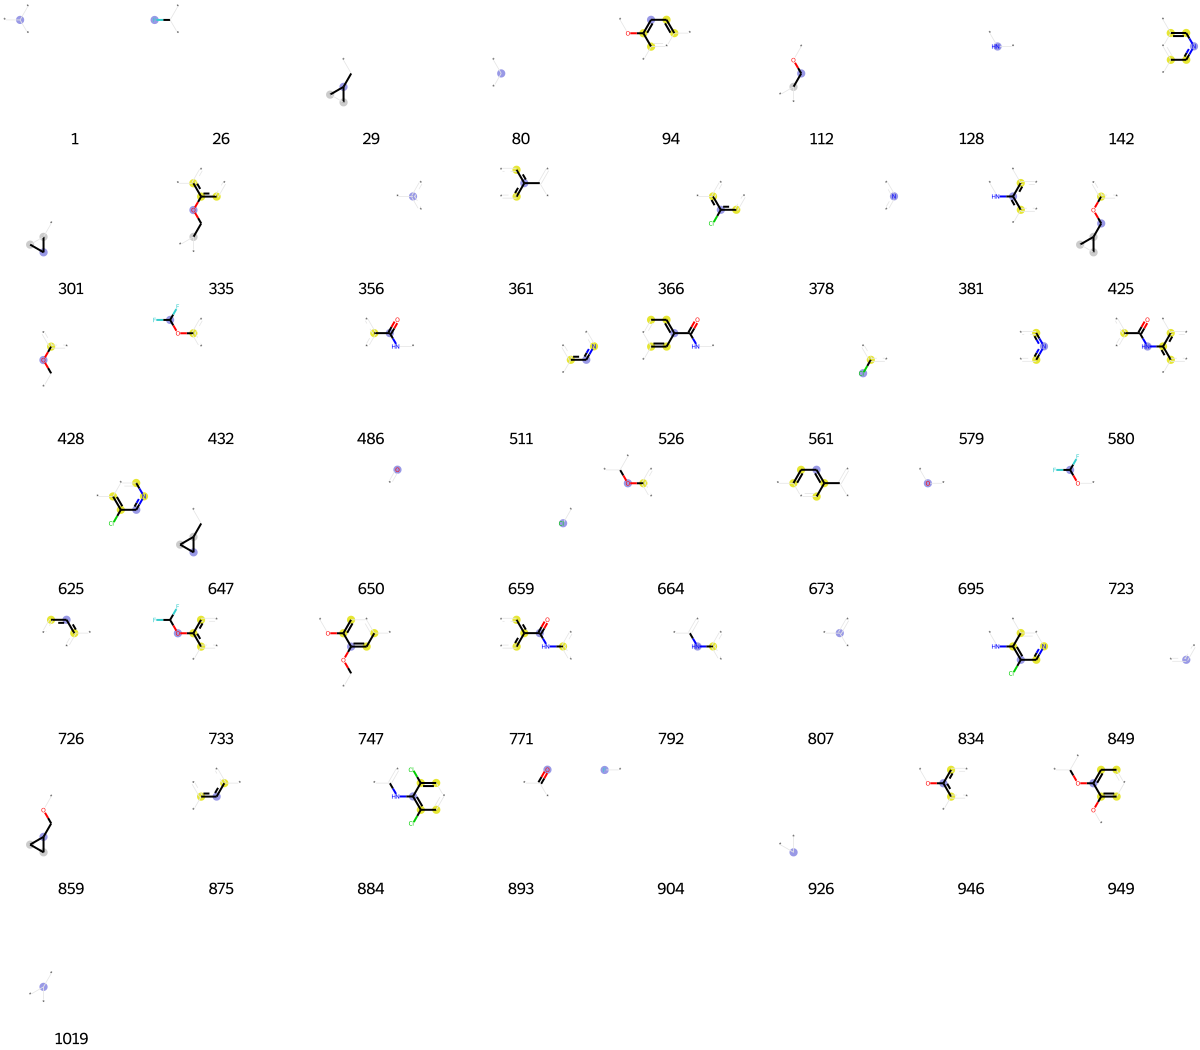

In [6630]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [6631]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 4,
 15,
 33,
 37,
 41,
 42,
 64,
 79,
 80,
 90,
 108,
 117,
 126,
 128,
 175,
 192,
 227,
 278,
 283,
 305,
 314,
 316,
 333,
 356,
 360,
 367,
 375,
 389,
 411,
 428,
 456,
 459,
 541,
 551,
 573,
 606,
 635,
 650,
 679,
 680,
 688,
 695,
 698,
 726,
 730,
 747,
 749,
 752,
 807,
 812,
 837,
 839,
 842,
 849,
 857,
 876,
 888,
 893,
 897,
 911,
 926,
 928,
 935,
 975,
 980]

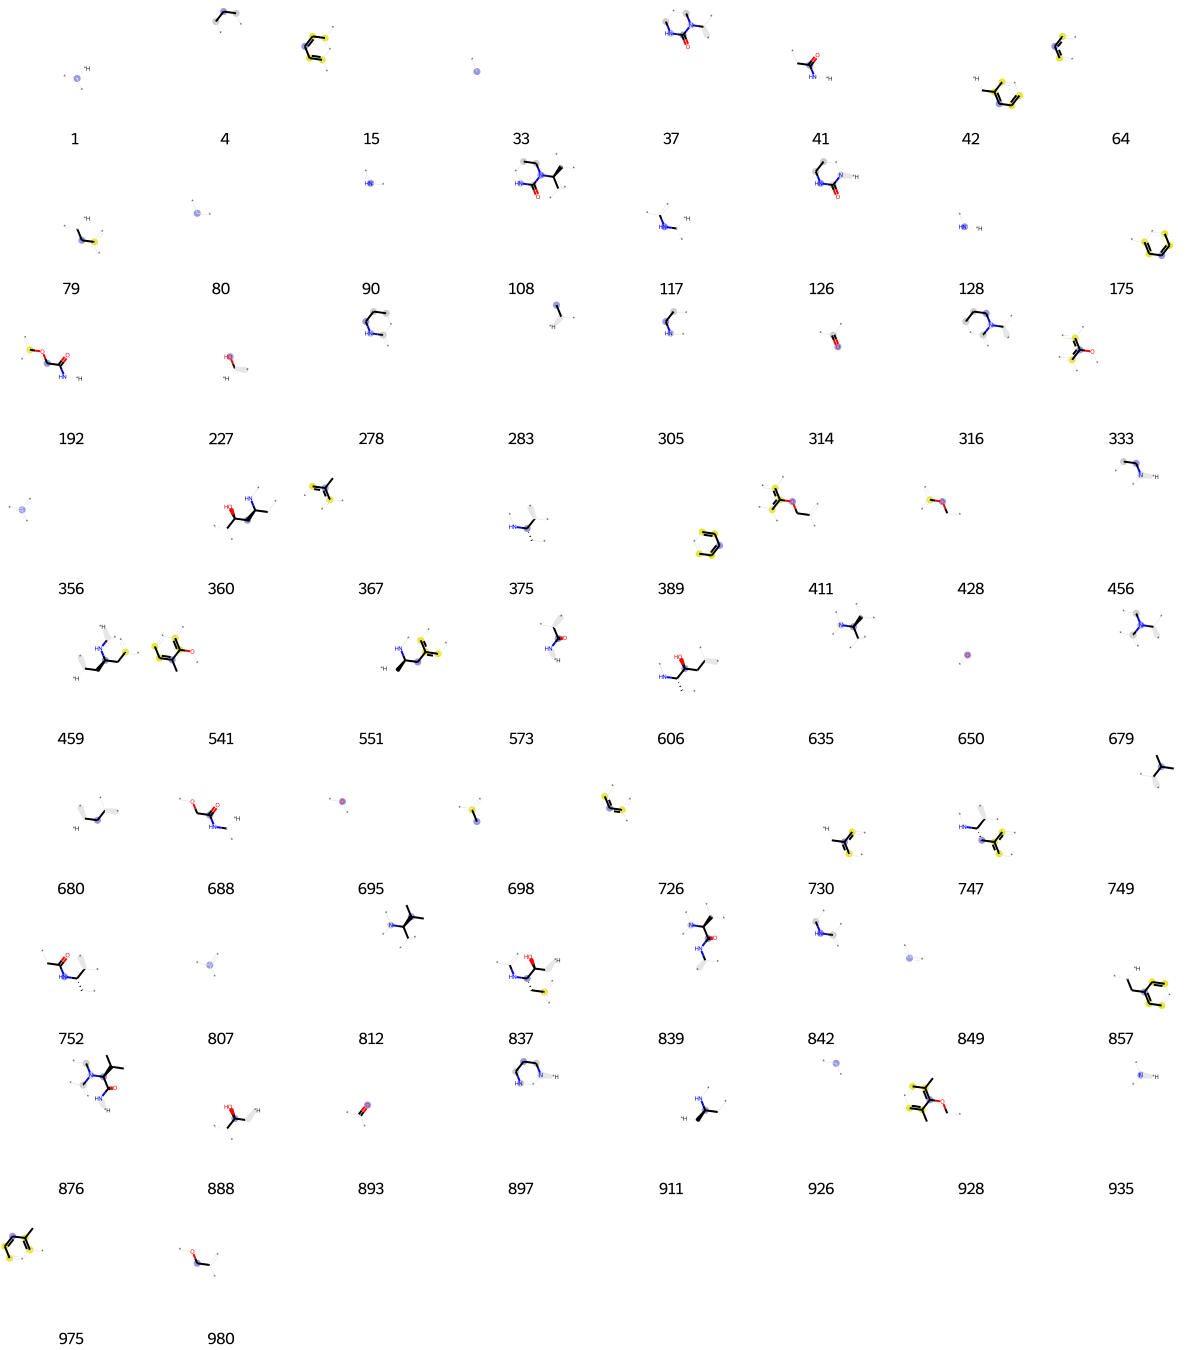

In [6632]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [6633]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 33,
 37,
 56,
 68,
 74,
 84,
 90,
 128,
 149,
 233,
 248,
 283,
 299,
 311,
 342,
 356,
 366,
 378,
 428,
 491,
 511,
 544,
 558,
 561,
 586,
 601,
 603,
 637,
 646,
 659,
 690,
 698,
 699,
 707,
 708,
 721,
 804,
 819,
 831,
 849,
 875,
 904,
 920,
 969,
 980]

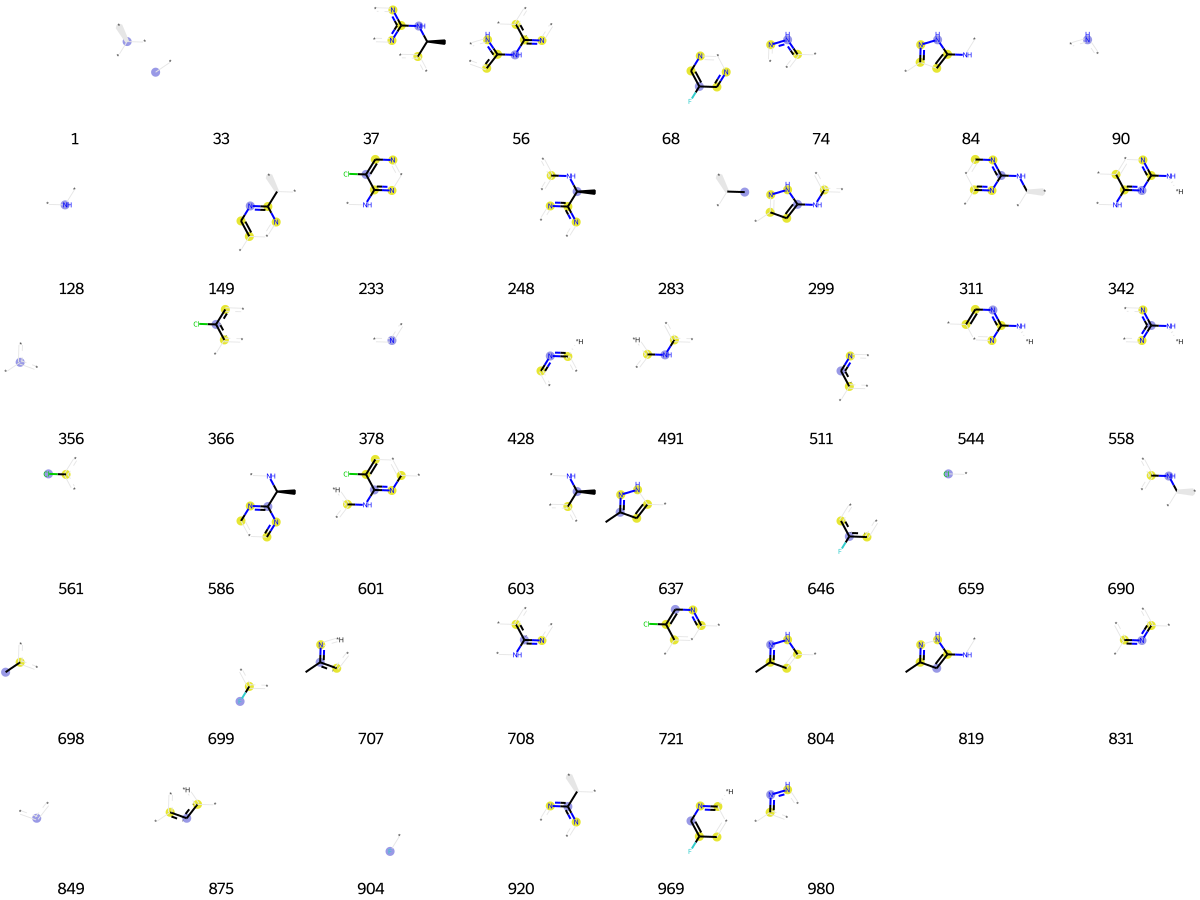

In [6634]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [6635]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 15,
 33,
 95,
 121,
 171,
 207,
 212,
 255,
 322,
 356,
 366,
 378,
 415,
 452,
 500,
 512,
 530,
 551,
 561,
 627,
 630,
 654,
 659,
 666,
 689,
 695,
 718,
 726,
 739,
 779,
 781,
 841,
 849,
 875,
 922,
 926,
 935,
 948,
 1019]

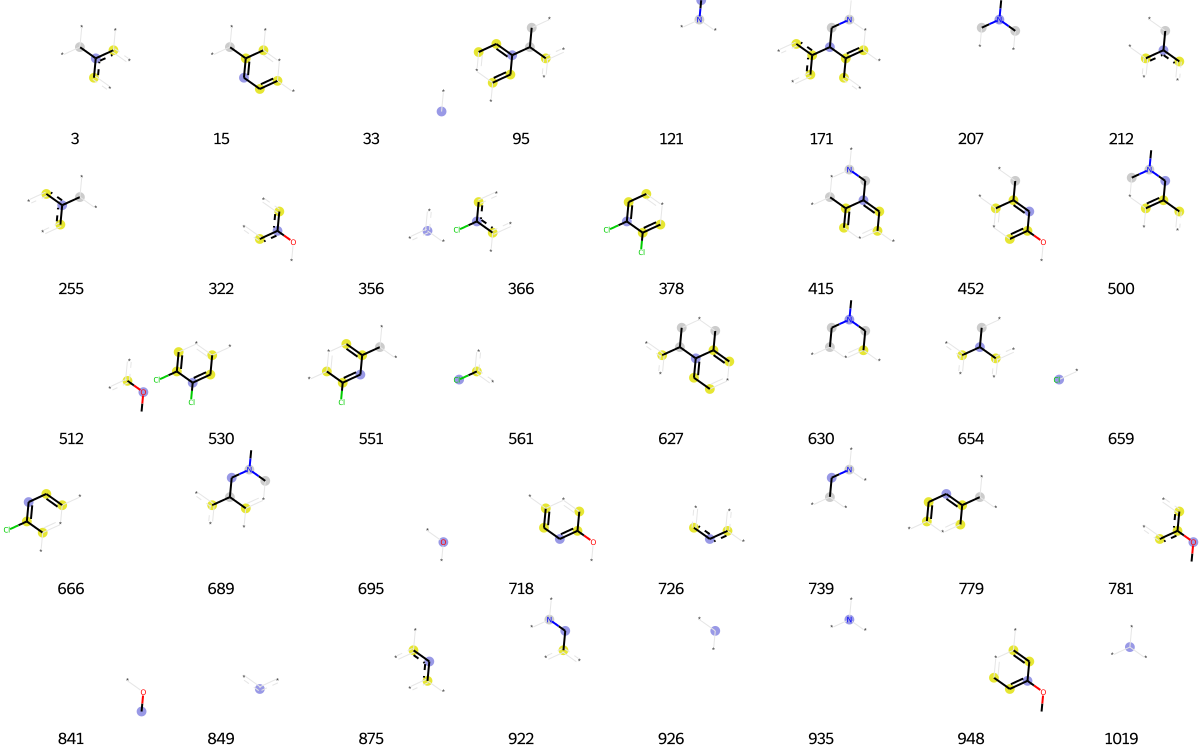

In [6636]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [6637]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[114,
 125,
 136,
 140,
 145,
 192,
 202,
 317,
 318,
 322,
 331,
 356,
 378,
 385,
 399,
 429,
 464,
 548,
 649,
 695,
 717,
 718,
 726,
 809,
 819,
 824,
 849,
 896,
 904,
 935,
 940,
 945,
 1004]

In [6638]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 11,
 41,
 69,
 72,
 73,
 114,
 135,
 136,
 294,
 301,
 325,
 347,
 356,
 393,
 413,
 429,
 441,
 456,
 496,
 576,
 586,
 623,
 641,
 650,
 652,
 656,
 695,
 726,
 738,
 741,
 776,
 807,
 808,
 839,
 849,
 875,
 881,
 884,
 893,
 904,
 925,
 926,
 929,
 935,
 985,
 1019]

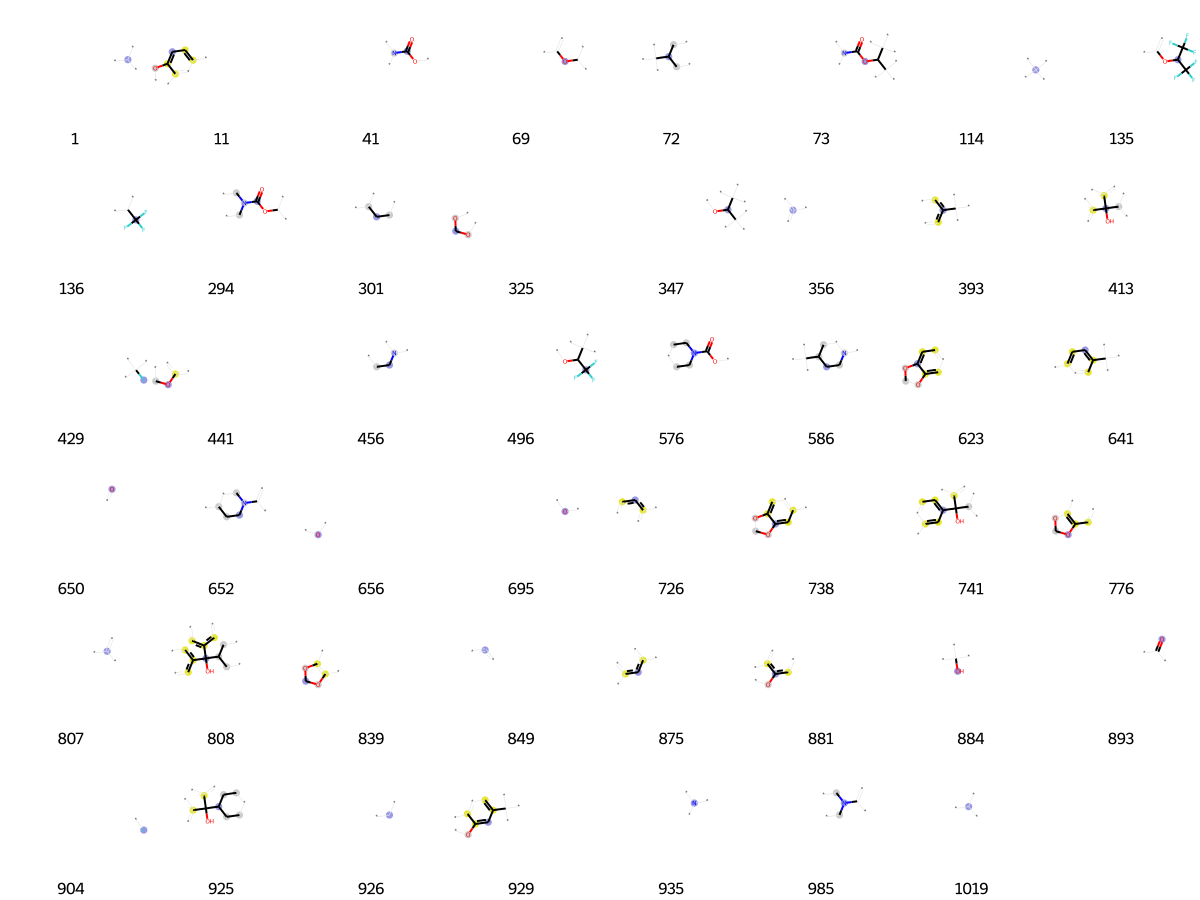

In [6639]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [6640]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[4,
 15,
 56,
 64,
 90,
 106,
 284,
 305,
 314,
 333,
 350,
 356,
 366,
 378,
 392,
 400,
 428,
 440,
 445,
 452,
 456,
 475,
 492,
 539,
 549,
 578,
 585,
 650,
 666,
 726,
 787,
 800,
 807,
 842,
 849,
 894,
 897,
 926,
 935,
 992,
 996,
 1020]

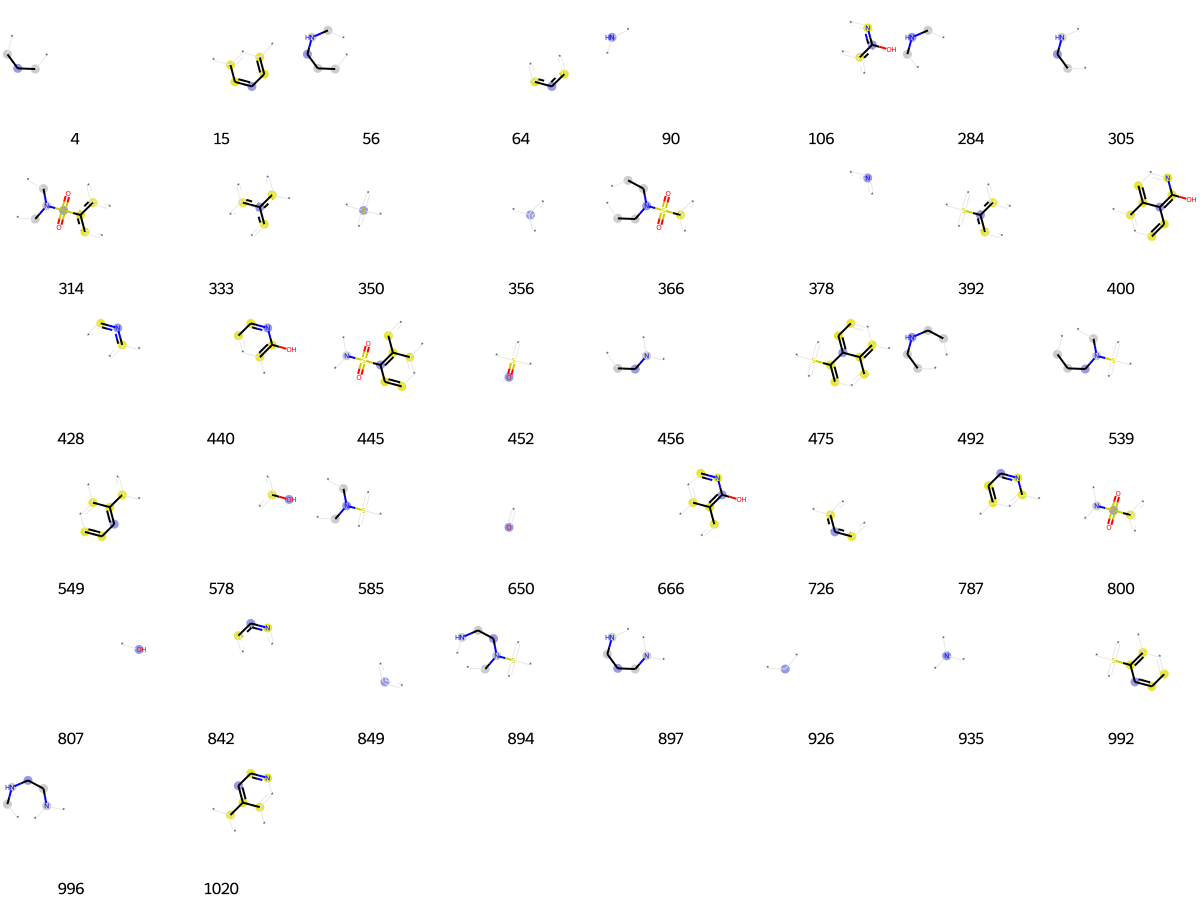

In [6641]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [6642]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[15,
 33,
 60,
 64,
 80,
 128,
 136,
 175,
 197,
 220,
 222,
 232,
 245,
 251,
 252,
 255,
 325,
 352,
 356,
 378,
 389,
 401,
 428,
 437,
 494,
 512,
 527,
 546,
 573,
 596,
 622,
 645,
 650,
 652,
 667,
 695,
 698,
 717,
 726,
 731,
 736,
 745,
 781,
 807,
 818,
 831,
 841,
 849,
 893,
 897,
 966,
 984,
 997,
 1004,
 1017]

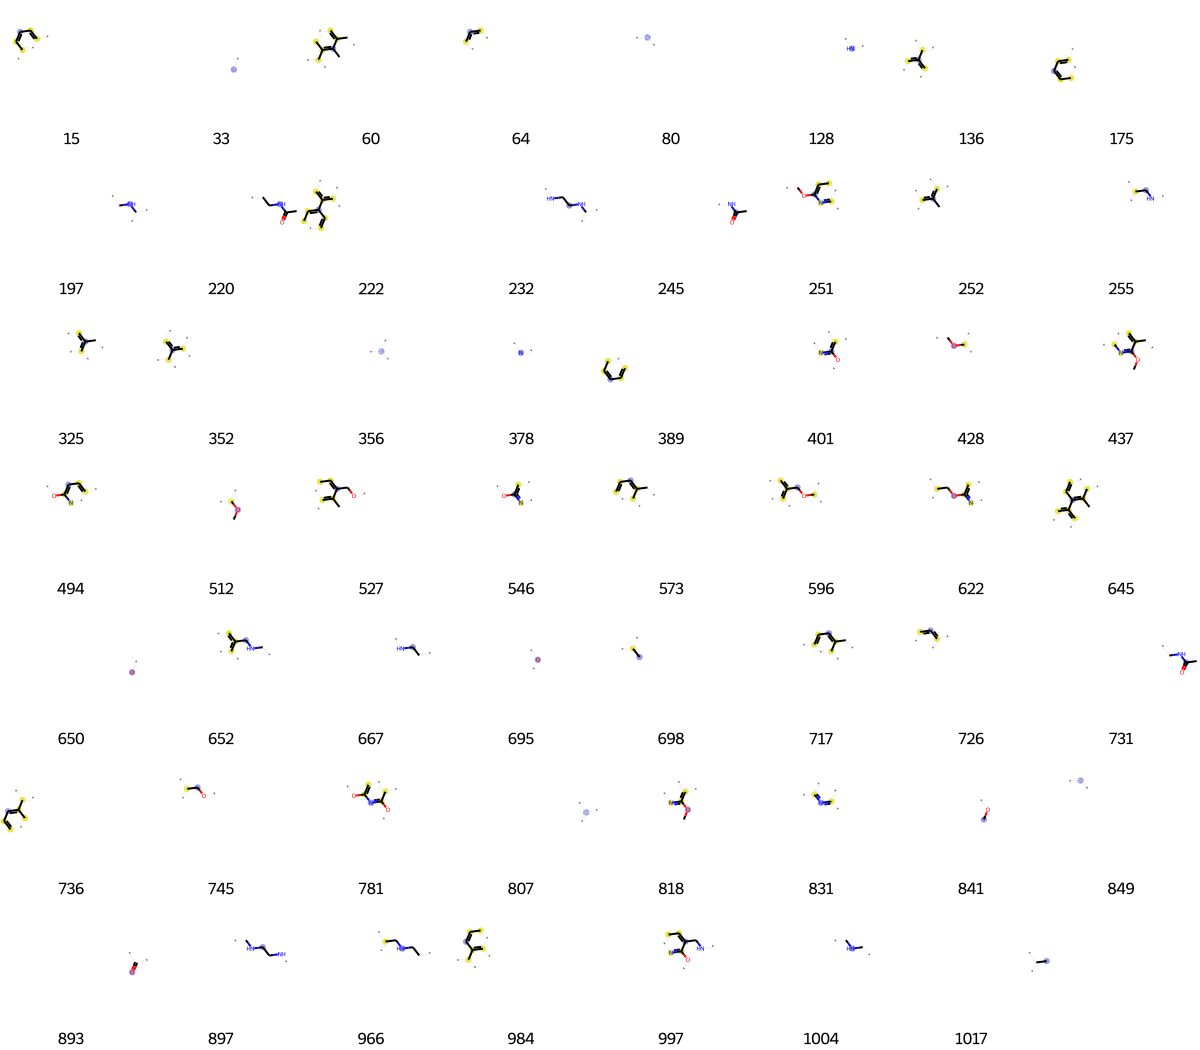

In [6643]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [6644]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[77,
 90,
 132,
 219,
 222,
 231,
 242,
 301,
 314,
 356,
 362,
 389,
 392,
 407,
 445,
 467,
 511,
 531,
 551,
 559,
 650,
 661,
 675,
 714,
 719,
 804,
 807,
 841,
 893,
 926,
 934,
 935,
 962,
 1019]

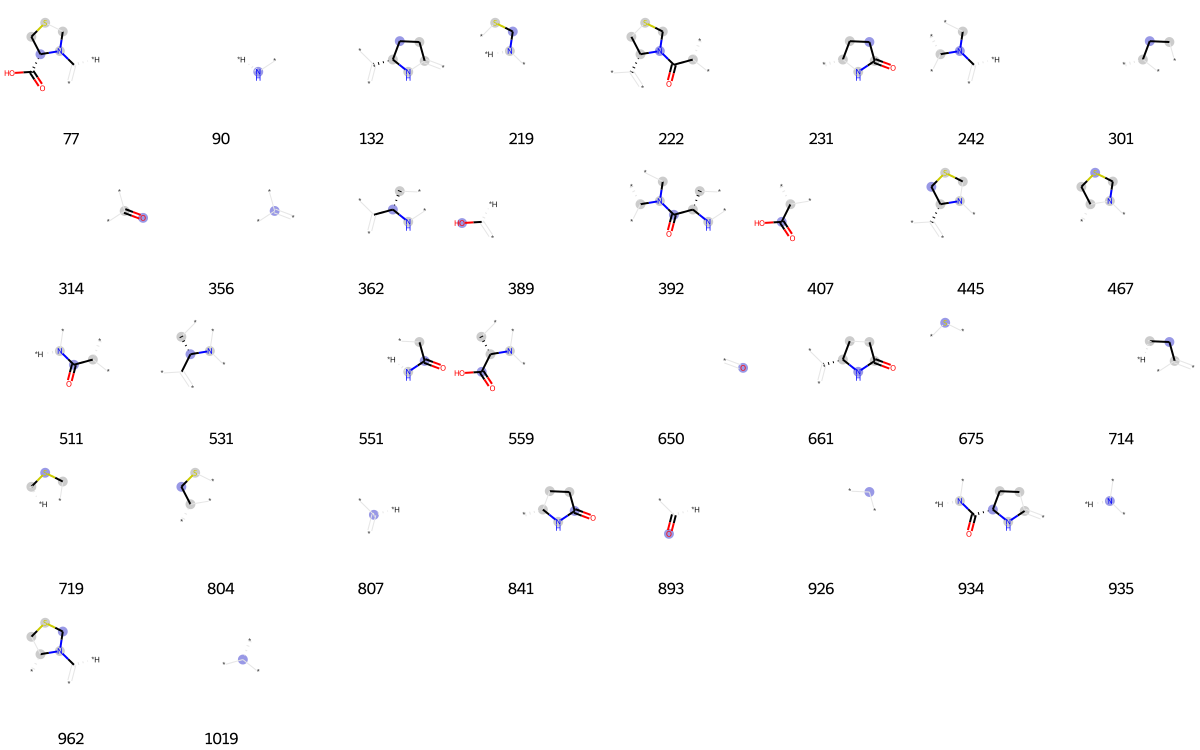

In [6645]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [6646]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[13,
 33,
 80,
 119,
 121,
 122,
 123,
 129,
 199,
 201,
 207,
 225,
 235,
 242,
 294,
 296,
 323,
 356,
 378,
 401,
 420,
 421,
 423,
 428,
 456,
 591,
 616,
 620,
 675,
 684,
 695,
 713,
 757,
 794,
 804,
 849,
 887,
 922,
 926,
 935,
 1014]

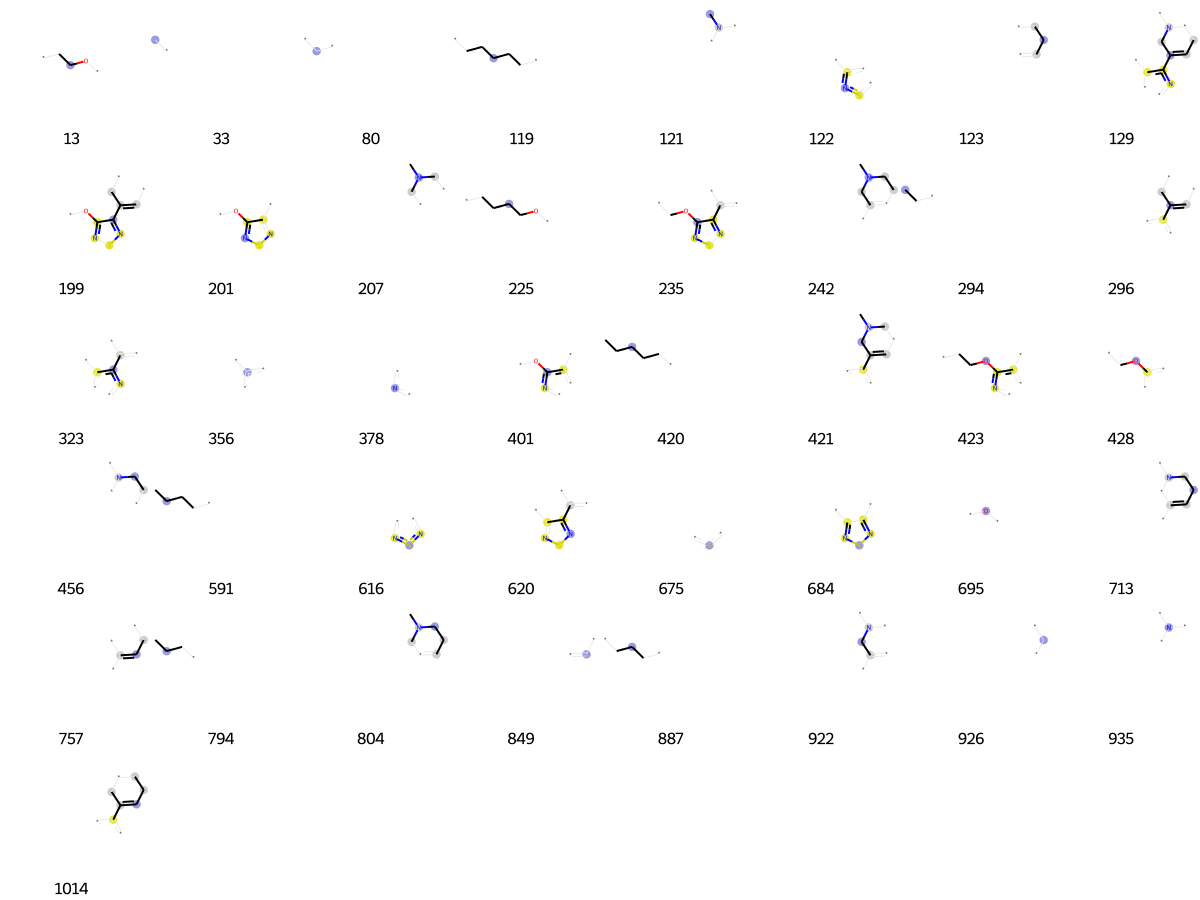

In [6647]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [6648]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[2,
 33,
 36,
 43,
 65,
 80,
 87,
 90,
 128,
 136,
 141,
 147,
 225,
 226,
 232,
 276,
 294,
 323,
 333,
 350,
 356,
 360,
 378,
 428,
 452,
 464,
 478,
 479,
 482,
 489,
 511,
 585,
 602,
 650,
 674,
 675,
 676,
 711,
 723,
 726,
 741,
 786,
 790,
 793,
 806,
 849,
 852,
 872,
 873,
 891,
 923,
 926,
 935,
 947]

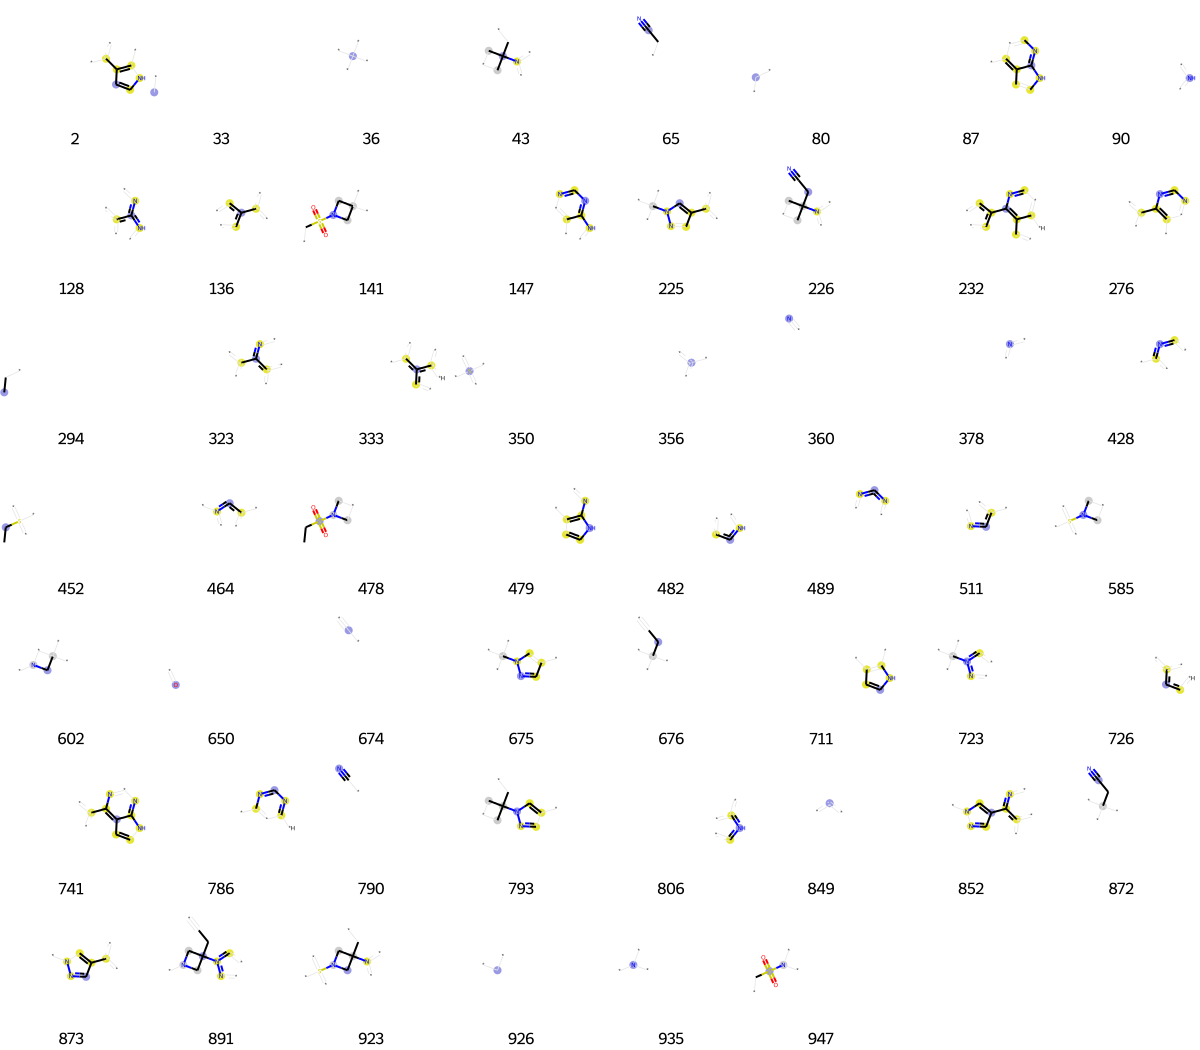

In [6649]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [6650]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[2,
 4,
 9,
 147,
 217,
 261,
 266,
 305,
 310,
 314,
 322,
 333,
 346,
 350,
 356,
 361,
 367,
 406,
 444,
 452,
 465,
 580,
 583,
 650,
 656,
 695,
 709,
 714,
 718,
 726,
 779,
 784,
 815,
 849,
 875,
 926,
 967]

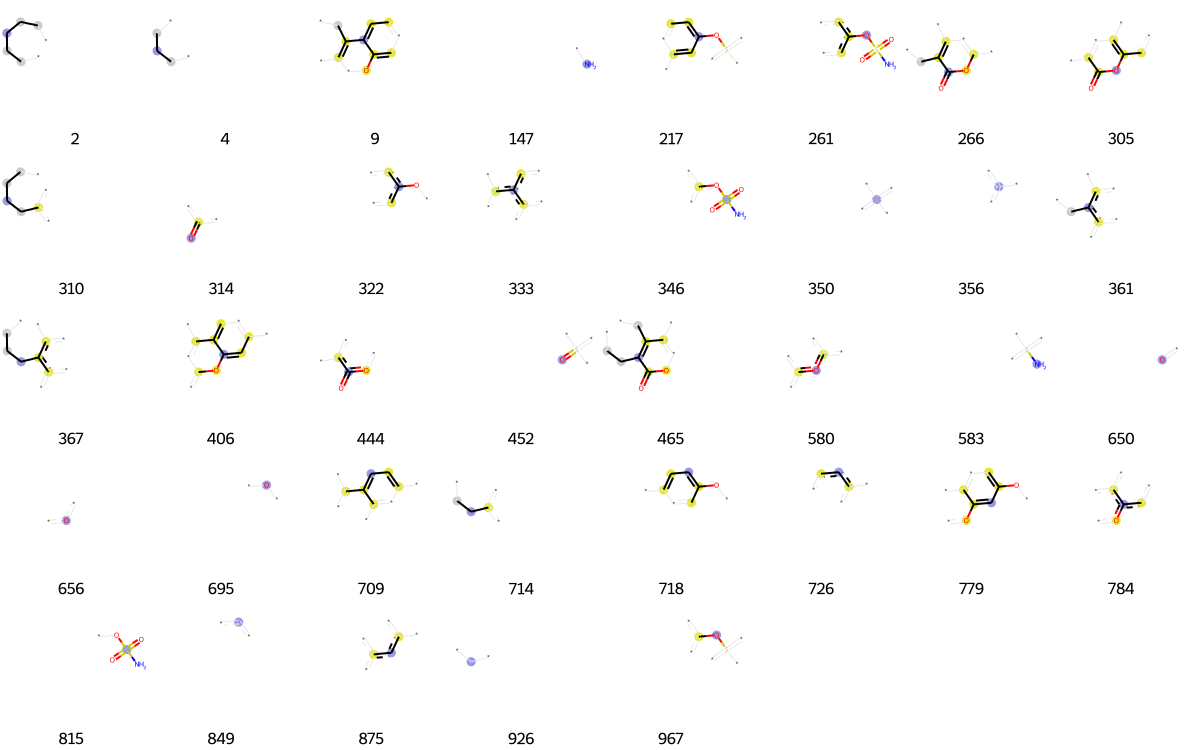

In [6651]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [6652]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[9,
 71,
 75,
 80,
 112,
 147,
 152,
 192,
 194,
 209,
 229,
 233,
 253,
 295,
 356,
 378,
 428,
 433,
 435,
 454,
 463,
 486,
 489,
 519,
 548,
 577,
 610,
 650,
 656,
 672,
 692,
 695,
 700,
 786,
 795,
 807,
 814,
 820,
 849,
 854,
 863,
 897,
 932,
 935,
 962,
 1019]

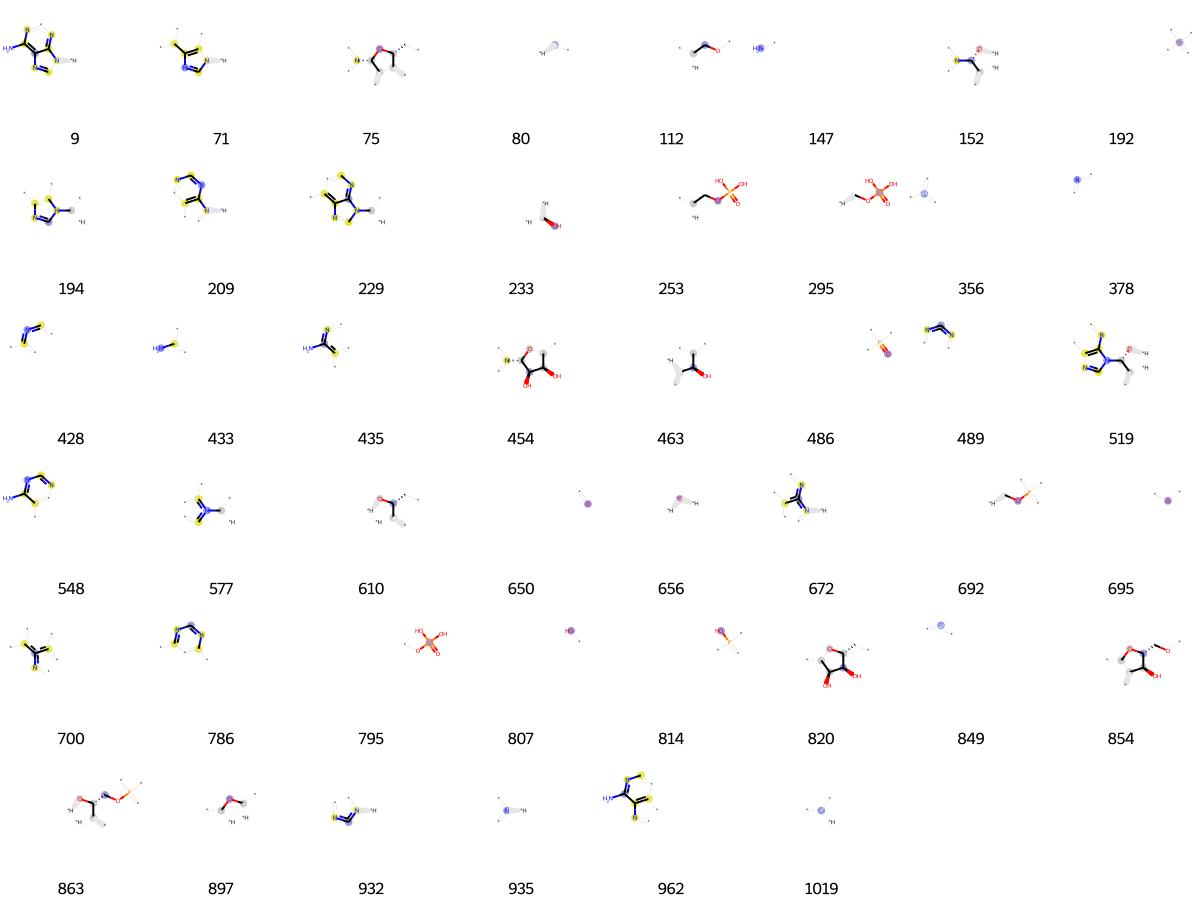

In [6653]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [6654]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 31,
 33,
 36,
 64,
 138,
 147,
 151,
 245,
 250,
 294,
 319,
 323,
 338,
 352,
 356,
 366,
 378,
 382,
 403,
 407,
 425,
 428,
 433,
 435,
 456,
 511,
 527,
 561,
 570,
 624,
 636,
 659,
 690,
 726,
 831,
 849,
 856,
 926,
 935,
 974,
 984,
 1009,
 1011]

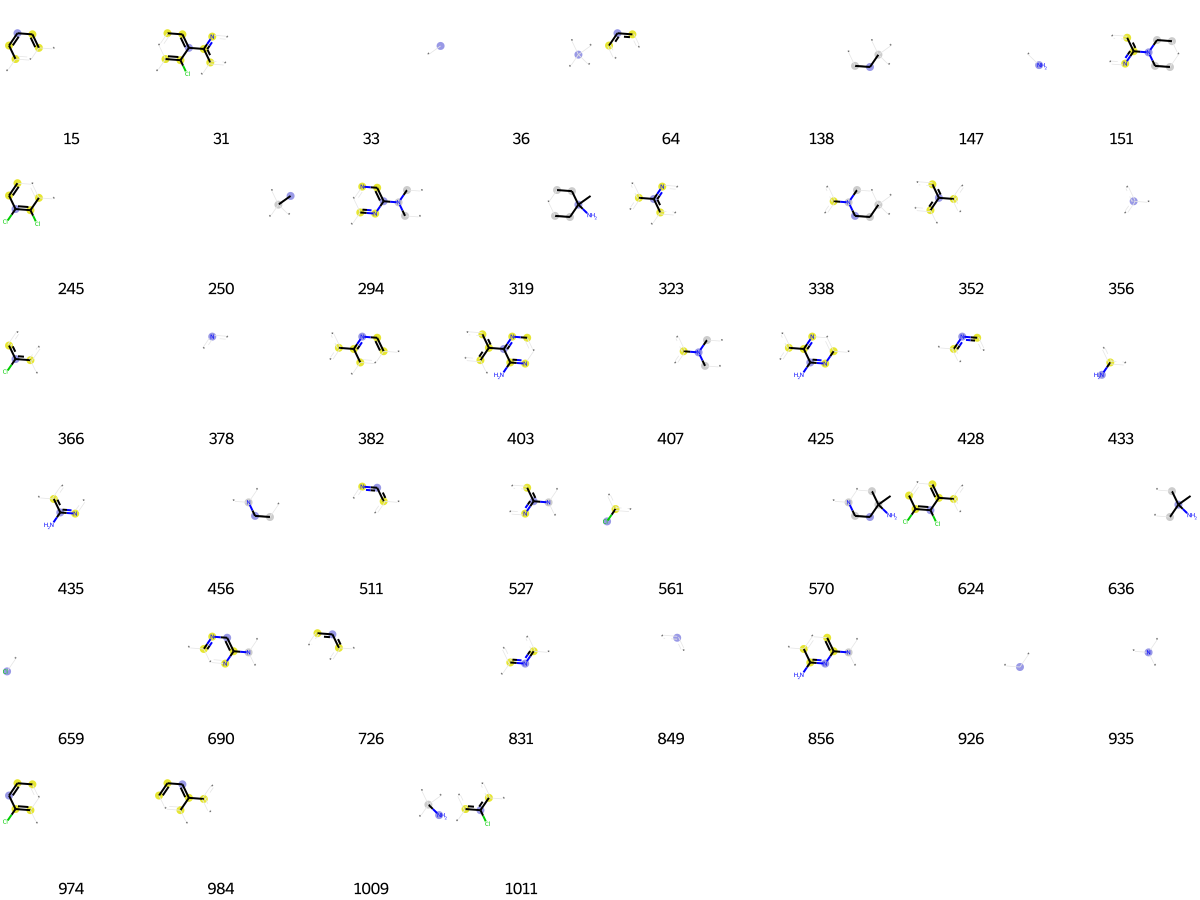

In [6655]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [6656]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[24,
 32,
 33,
 75,
 80,
 90,
 120,
 152,
 210,
 222,
 233,
 296,
 314,
 356,
 367,
 377,
 445,
 463,
 464,
 492,
 577,
 588,
 610,
 650,
 656,
 698,
 721,
 740,
 750,
 758,
 807,
 849,
 872,
 896,
 897,
 904,
 935,
 958,
 1019]

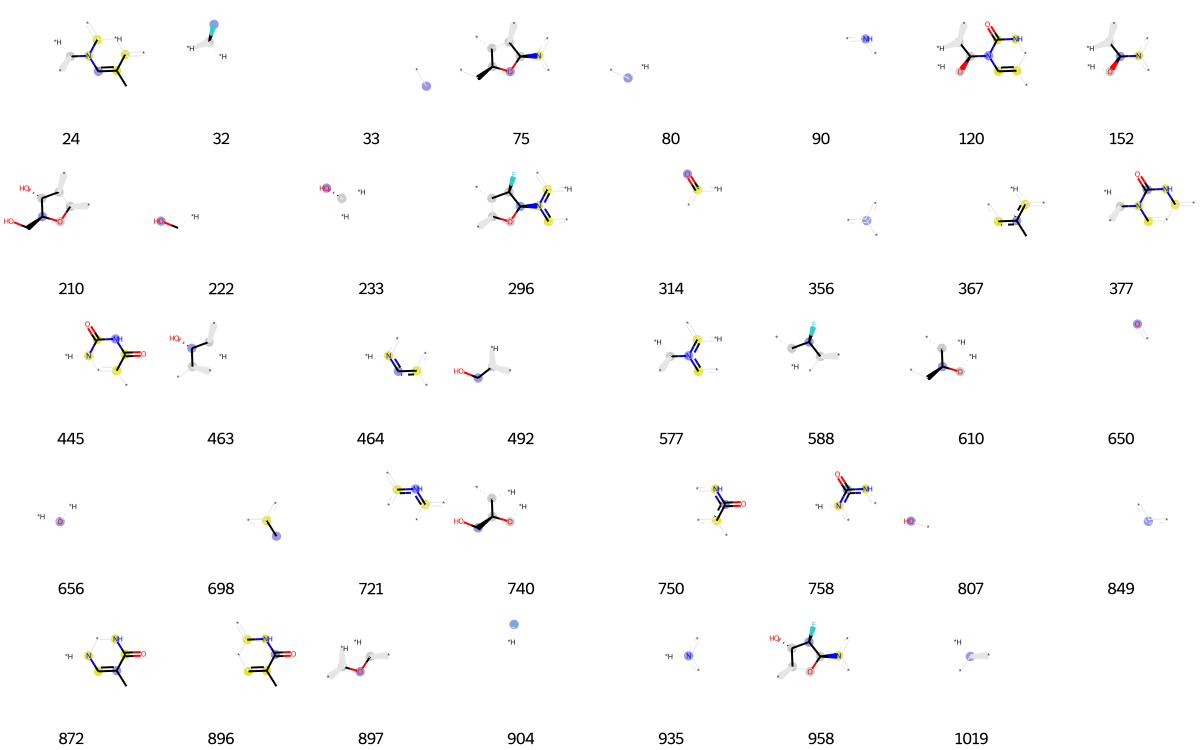

In [6657]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [6658]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 11,
 13,
 33,
 67,
 80,
 121,
 139,
 237,
 274,
 283,
 356,
 367,
 422,
 428,
 444,
 494,
 528,
 598,
 650,
 652,
 659,
 693,
 695,
 698,
 700,
 705,
 751,
 807,
 815,
 849,
 875,
 881,
 893,
 927,
 940,
 946,
 1017]

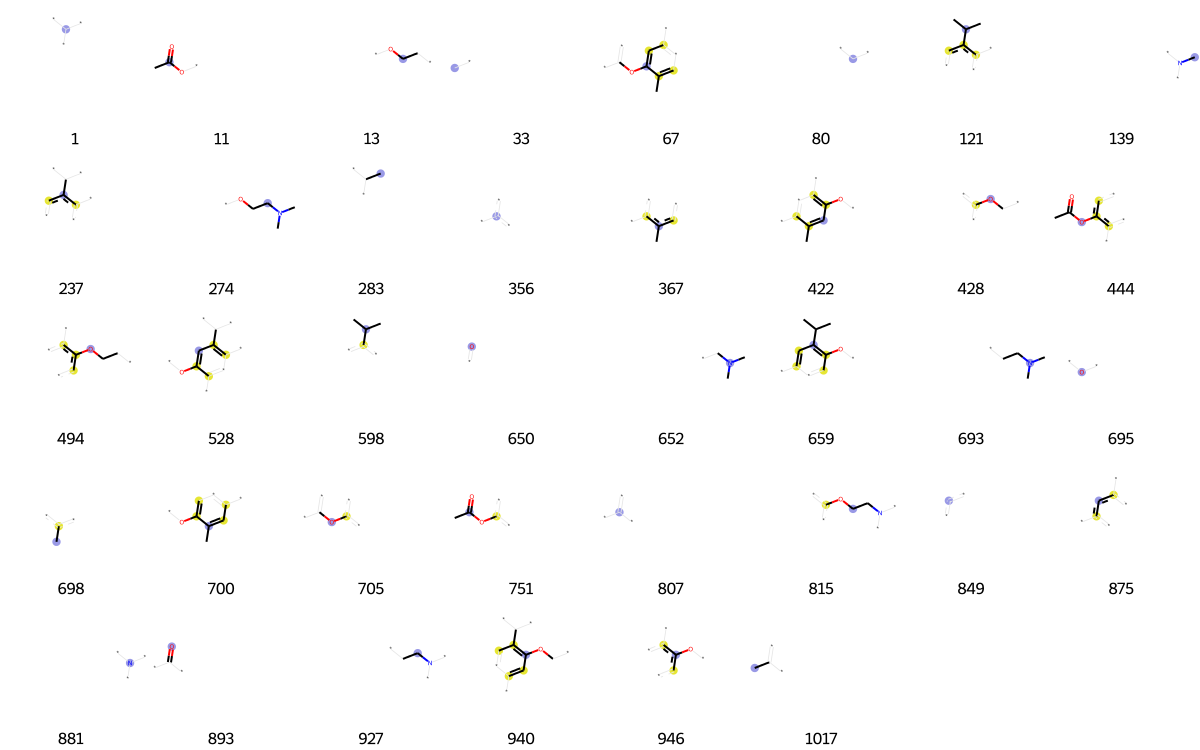

In [6659]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [6660]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 33,
 80,
 119,
 147,
 222,
 227,
 278,
 294,
 332,
 401,
 416,
 420,
 433,
 482,
 510,
 550,
 591,
 600,
 694,
 752,
 775,
 786,
 794,
 807,
 887,
 967,
 1015]

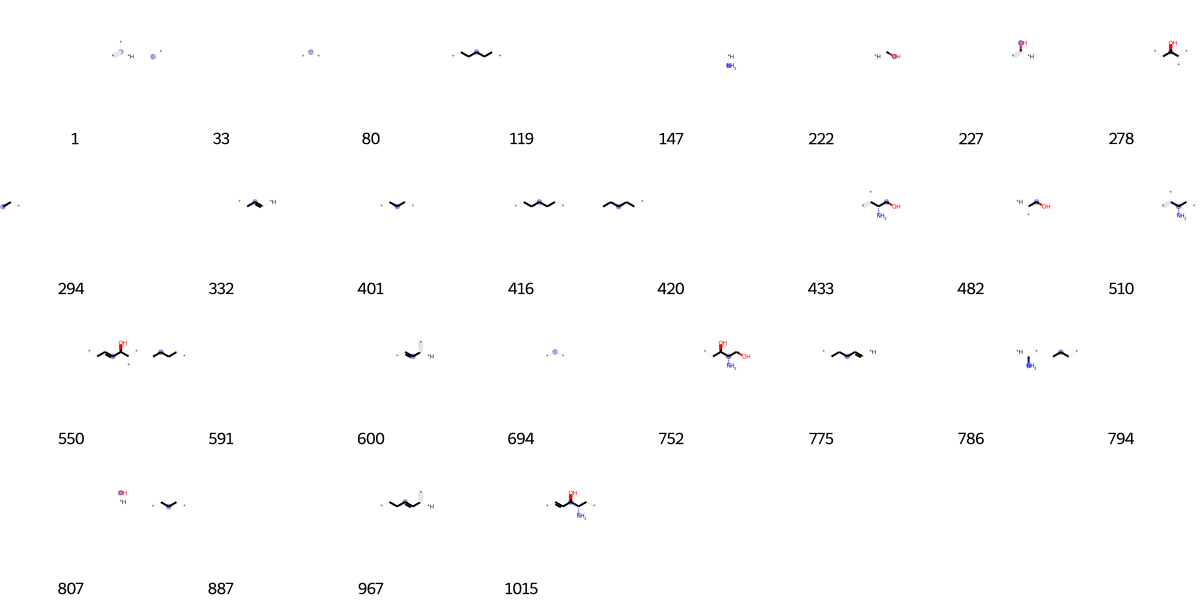

In [6661]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [6662]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 37,
 59,
 79,
 114,
 115,
 128,
 139,
 188,
 197,
 200,
 272,
 279,
 319,
 320,
 350,
 356,
 361,
 366,
 392,
 429,
 452,
 547,
 561,
 580,
 587,
 629,
 650,
 659,
 673,
 715,
 726,
 789,
 790,
 792,
 807,
 832,
 835,
 849,
 875,
 881,
 884,
 888,
 893,
 904,
 974,
 1008]

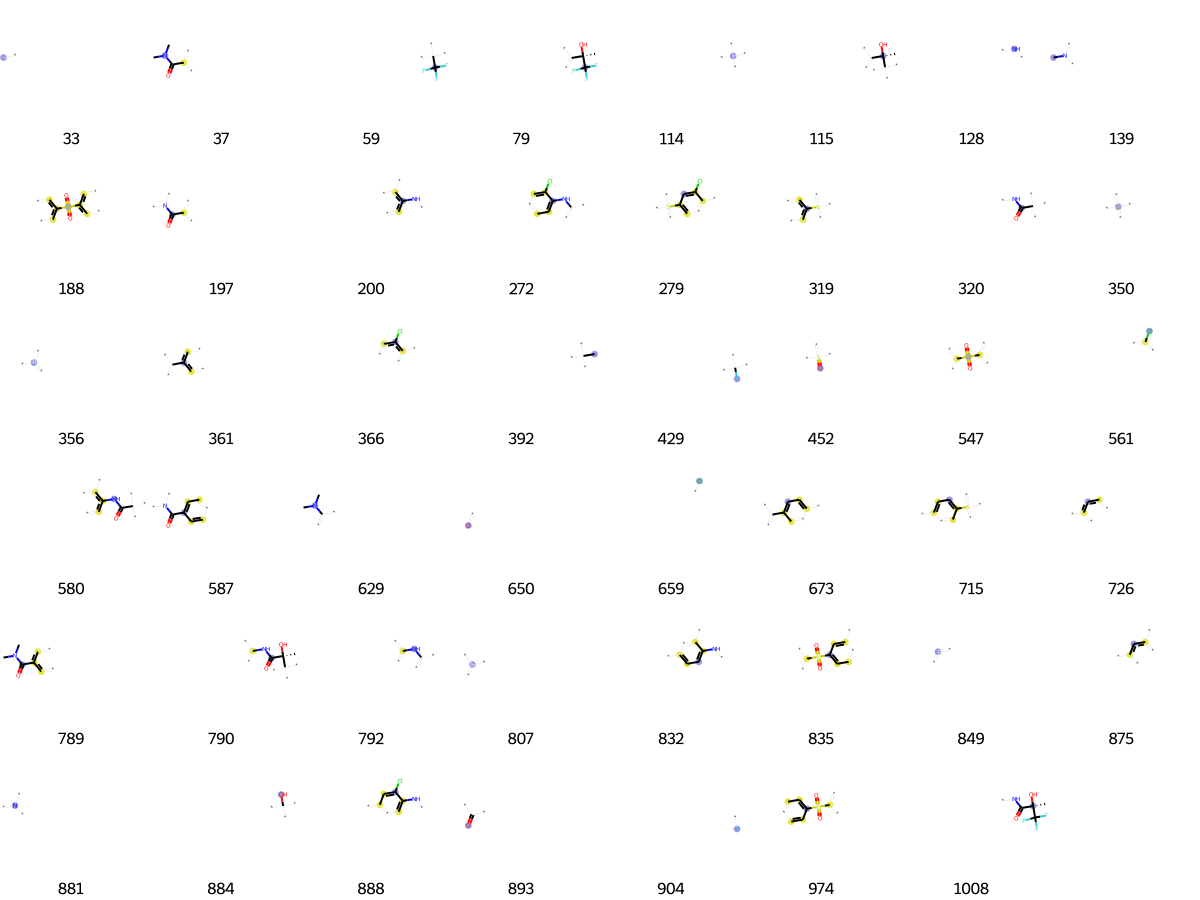

In [6663]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [6664]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[15,
 31,
 33,
 64,
 80,
 128,
 141,
 157,
 167,
 197,
 284,
 294,
 327,
 329,
 356,
 485,
 600,
 607,
 650,
 694,
 702,
 726,
 728,
 766,
 807,
 835,
 849,
 875,
 893,
 909,
 942,
 1009,
 1017]

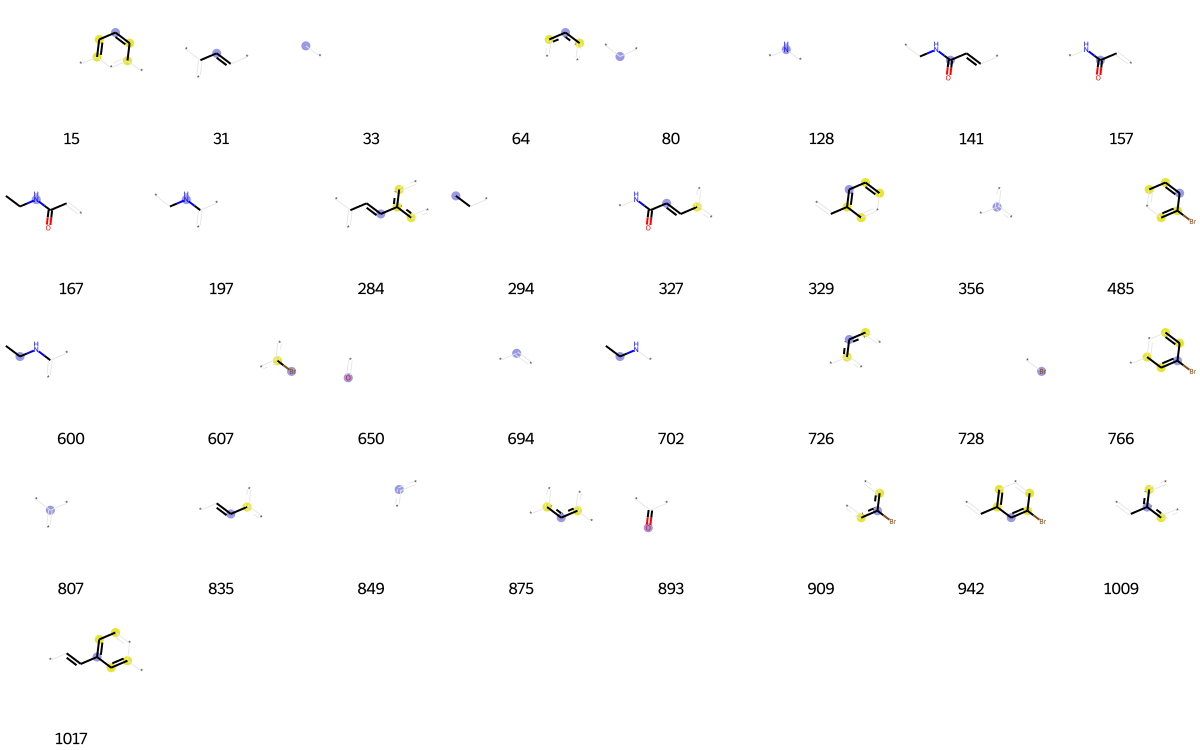

In [6665]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [6666]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[14,
 15,
 33,
 46,
 52,
 53,
 64,
 75,
 121,
 128,
 141,
 191,
 193,
 204,
 207,
 211,
 212,
 233,
 249,
 322,
 356,
 367,
 377,
 378,
 381,
 401,
 407,
 428,
 456,
 461,
 484,
 489,
 491,
 500,
 512,
 513,
 547,
 635,
 650,
 687,
 695,
 698,
 718,
 721,
 726,
 766,
 781,
 786,
 792,
 801,
 807,
 841,
 843,
 849,
 875,
 881,
 893,
 894,
 926,
 935,
 946,
 948,
 965,
 975,
 994]

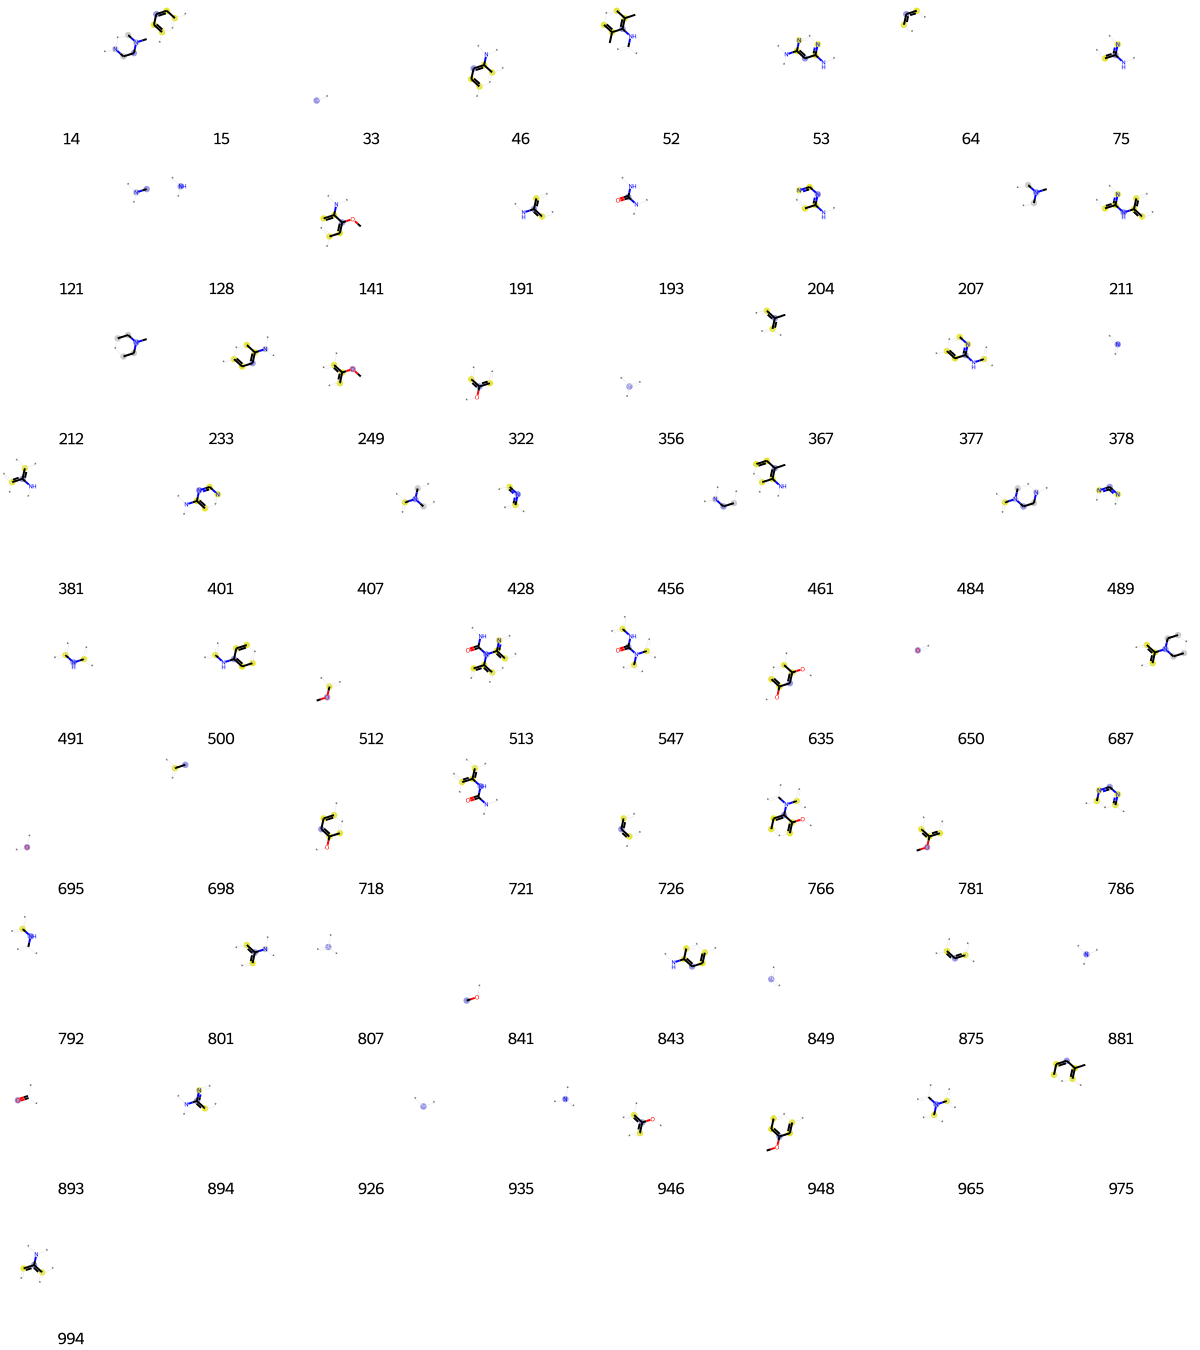

In [6667]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [6668]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 15,
 33,
 64,
 65,
 80,
 128,
 227,
 338,
 341,
 343,
 356,
 381,
 406,
 410,
 411,
 557,
 578,
 606,
 632,
 726,
 745,
 807,
 844,
 849,
 875,
 971]

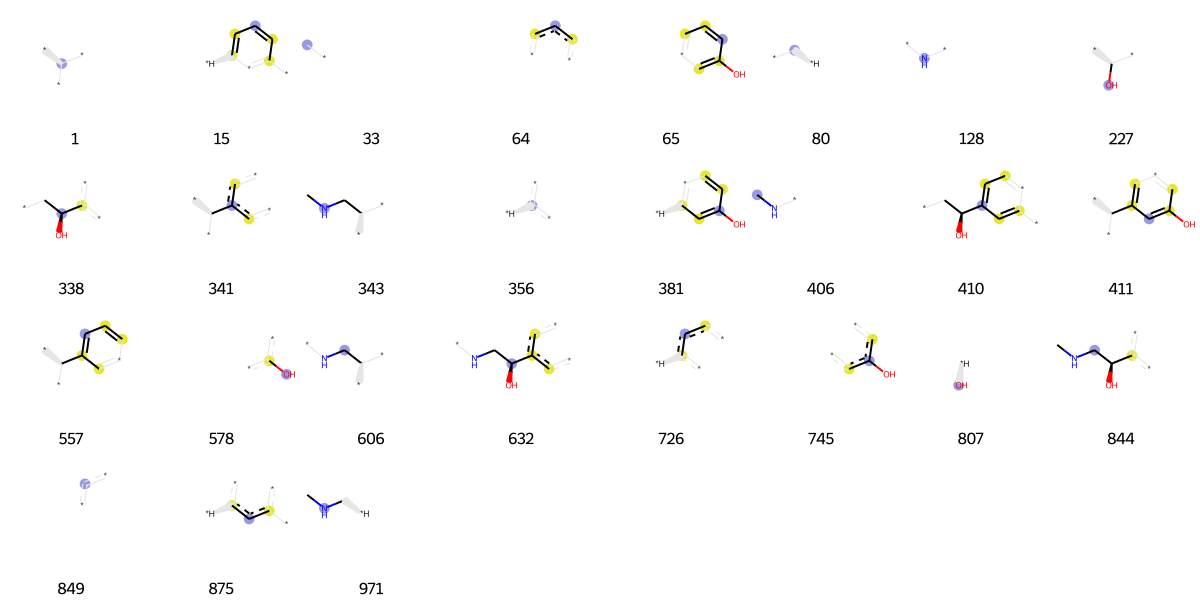

In [6669]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [6670]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 64,
 66,
 80,
 114,
 139,
 145,
 147,
 175,
 203,
 212,
 249,
 282,
 294,
 295,
 303,
 315,
 333,
 350,
 356,
 361,
 389,
 393,
 428,
 487,
 498,
 512,
 575,
 650,
 656,
 695,
 726,
 807,
 841,
 849,
 865,
 868,
 875,
 881,
 893,
 946,
 993,
 1015]

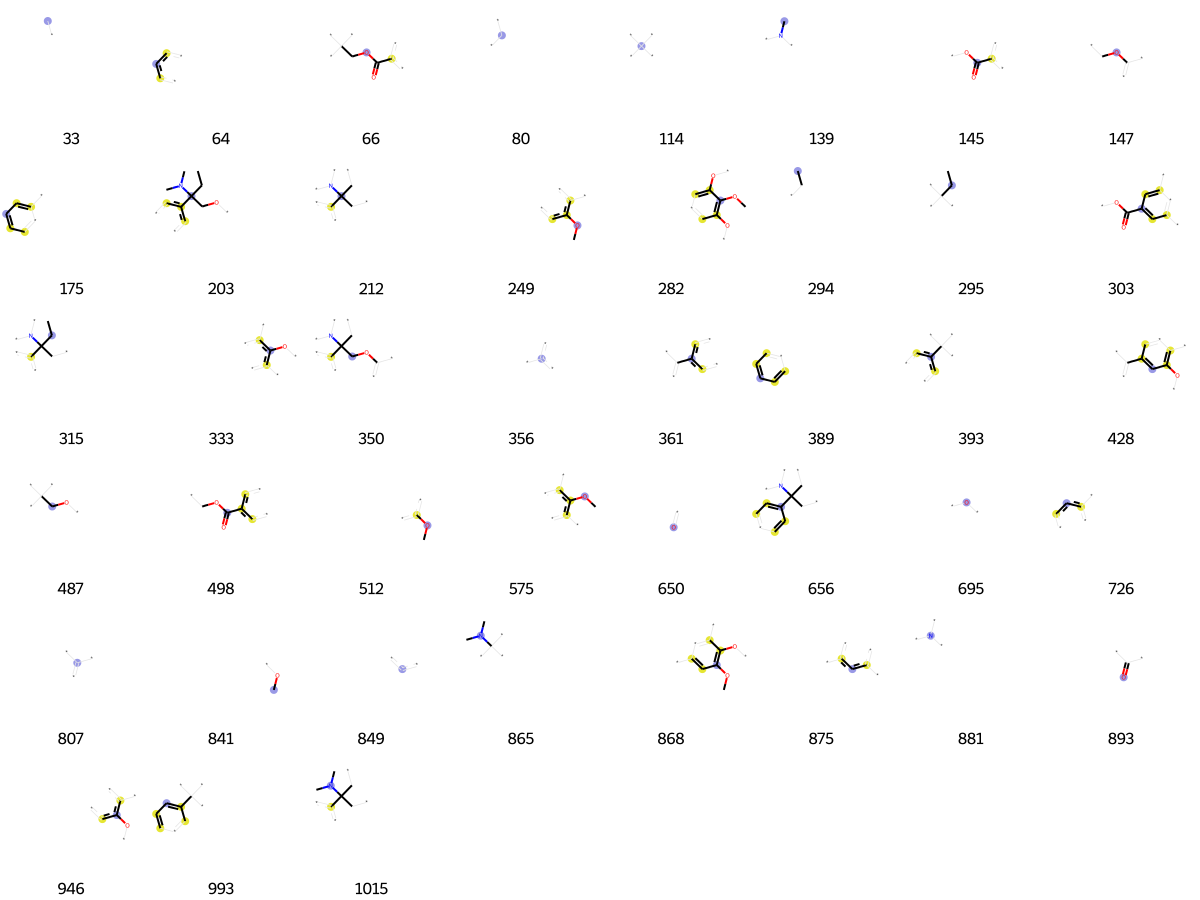

In [6671]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [6672]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[11,
 33,
 55,
 80,
 90,
 102,
 110,
 233,
 310,
 322,
 356,
 432,
 458,
 463,
 470,
 483,
 512,
 521,
 564,
 621,
 650,
 695,
 718,
 726,
 730,
 781,
 807,
 831,
 841,
 849,
 893,
 926,
 1002,
 1008,
 1009,
 1017,
 1019]

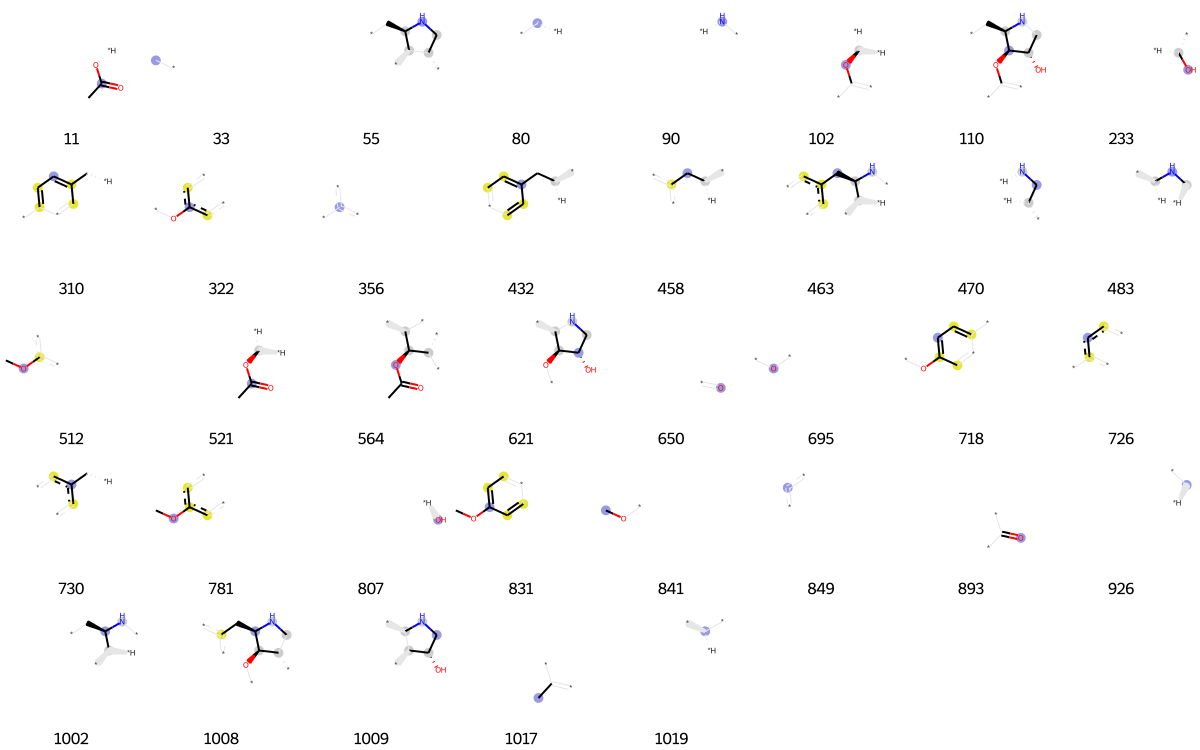

In [6673]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [6674]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[21,
 33,
 36,
 63,
 80,
 102,
 130,
 138,
 152,
 171,
 196,
 222,
 233,
 250,
 268,
 285,
 314,
 322,
 356,
 425,
 515,
 519,
 532,
 546,
 549,
 553,
 570,
 585,
 616,
 628,
 644,
 650,
 669,
 672,
 694,
 695,
 698,
 699,
 709,
 712,
 728,
 740,
 766,
 807,
 837,
 844,
 849,
 893,
 904,
 918,
 926,
 928,
 989,
 1002,
 1003,
 1009,
 1017,
 1019,
 1020]

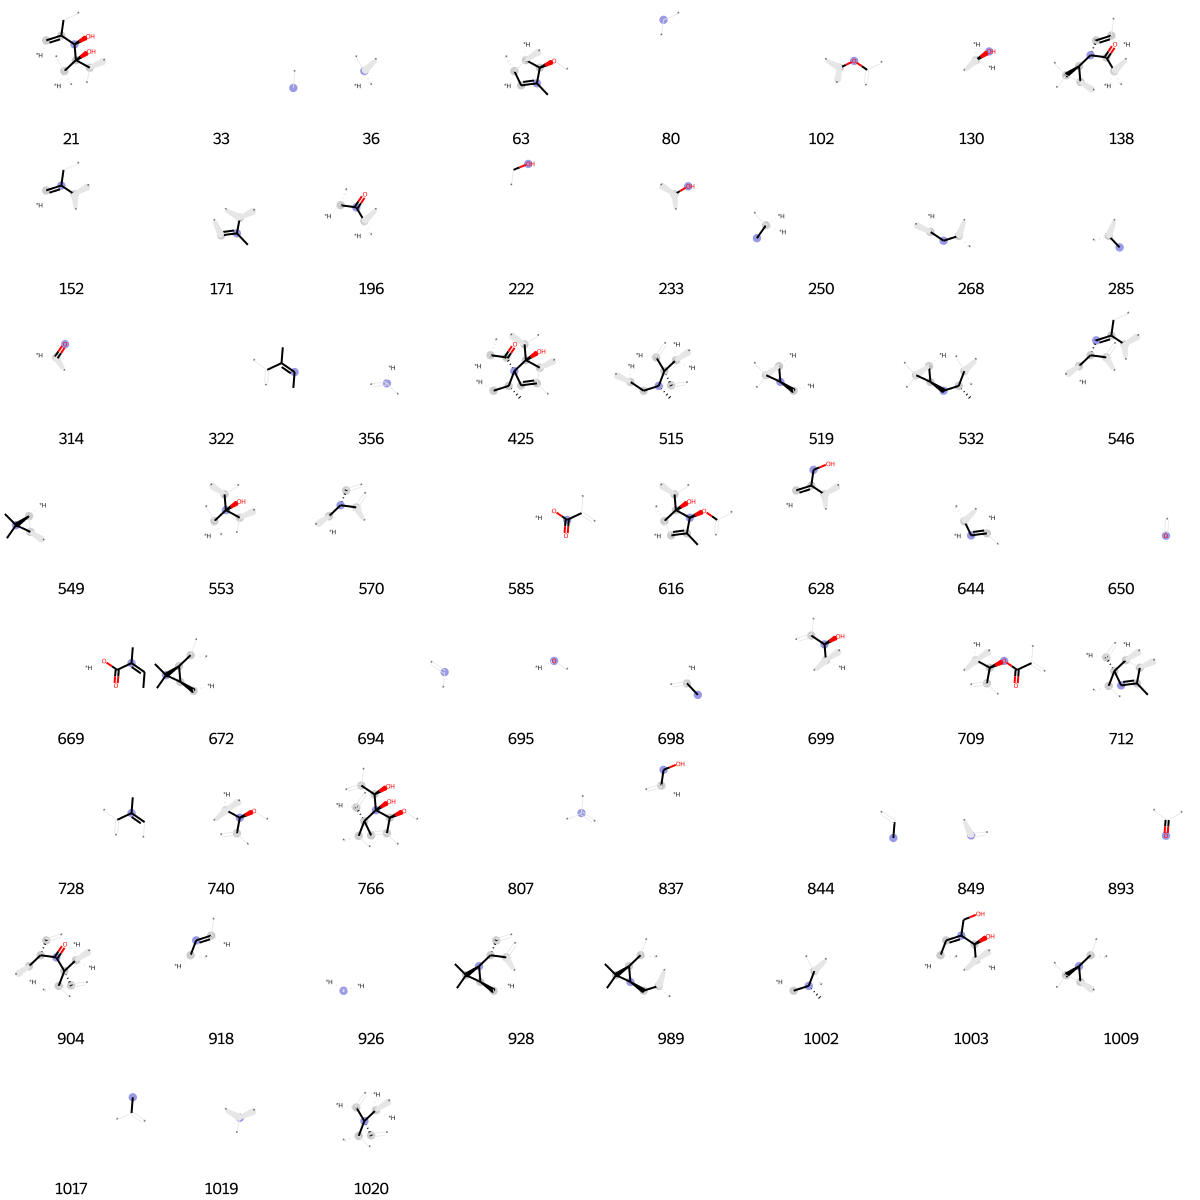

In [6675]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [6676]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[9,
 14,
 33,
 43,
 54,
 64,
 79,
 112,
 126,
 136,
 138,
 139,
 216,
 225,
 241,
 260,
 305,
 356,
 378,
 383,
 412,
 419,
 428,
 444,
 511,
 515,
 522,
 543,
 558,
 564,
 565,
 608,
 650,
 668,
 672,
 675,
 699,
 726,
 787,
 807,
 816,
 842,
 845,
 849,
 863,
 875,
 881,
 890,
 893,
 896,
 904,
 915,
 935,
 967,
 994,
 1017,
 1021]

In [6677]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 3,
 10,
 13,
 33,
 45,
 49,
 64,
 80,
 94,
 101,
 102,
 104,
 121,
 130,
 139,
 140,
 175,
 179,
 212,
 219,
 221,
 249,
 260,
 261,
 283,
 310,
 319,
 322,
 333,
 350,
 356,
 428,
 452,
 506,
 512,
 547,
 549,
 559,
 564,
 598,
 602,
 633,
 650,
 677,
 695,
 702,
 703,
 715,
 718,
 726,
 730,
 738,
 812,
 841,
 849,
 875,
 881,
 887,
 927,
 935,
 946,
 974]

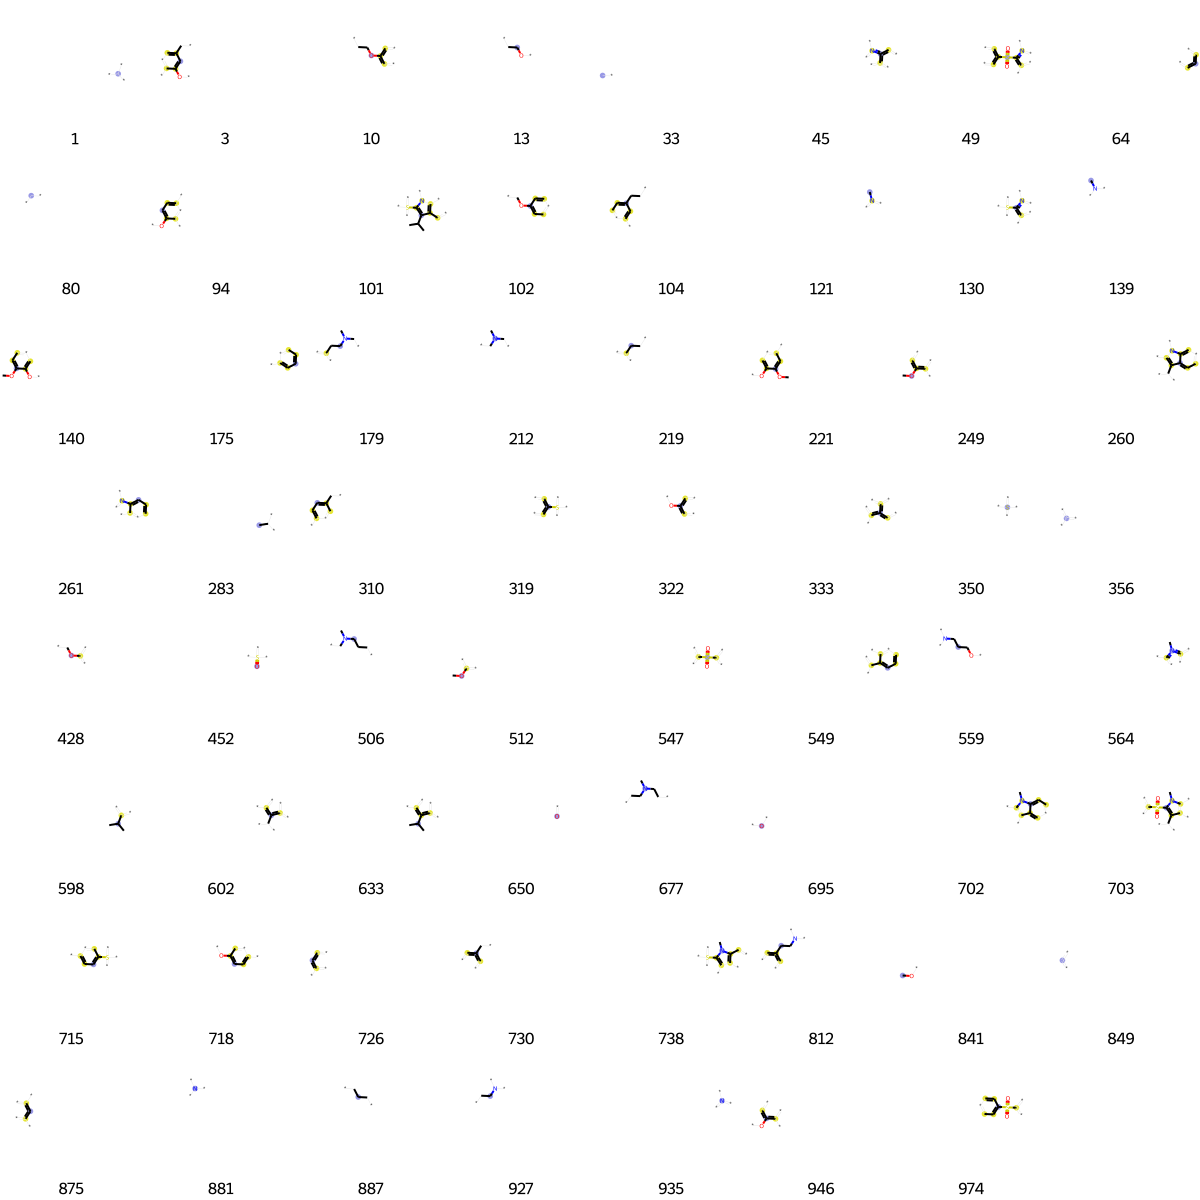

In [6678]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [6679]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[7,
 19,
 33,
 36,
 59,
 64,
 73,
 84,
 90,
 102,
 106,
 124,
 139,
 140,
 147,
 171,
 176,
 225,
 231,
 233,
 268,
 273,
 278,
 284,
 285,
 314,
 322,
 355,
 356,
 368,
 410,
 452,
 463,
 487,
 512,
 551,
 599,
 609,
 633,
 650,
 695,
 698,
 706,
 713,
 722,
 744,
 745,
 747,
 750,
 756,
 798,
 801,
 807,
 841,
 849,
 862,
 866,
 871,
 893,
 911,
 913,
 918,
 922,
 926,
 934,
 937,
 949,
 1019]

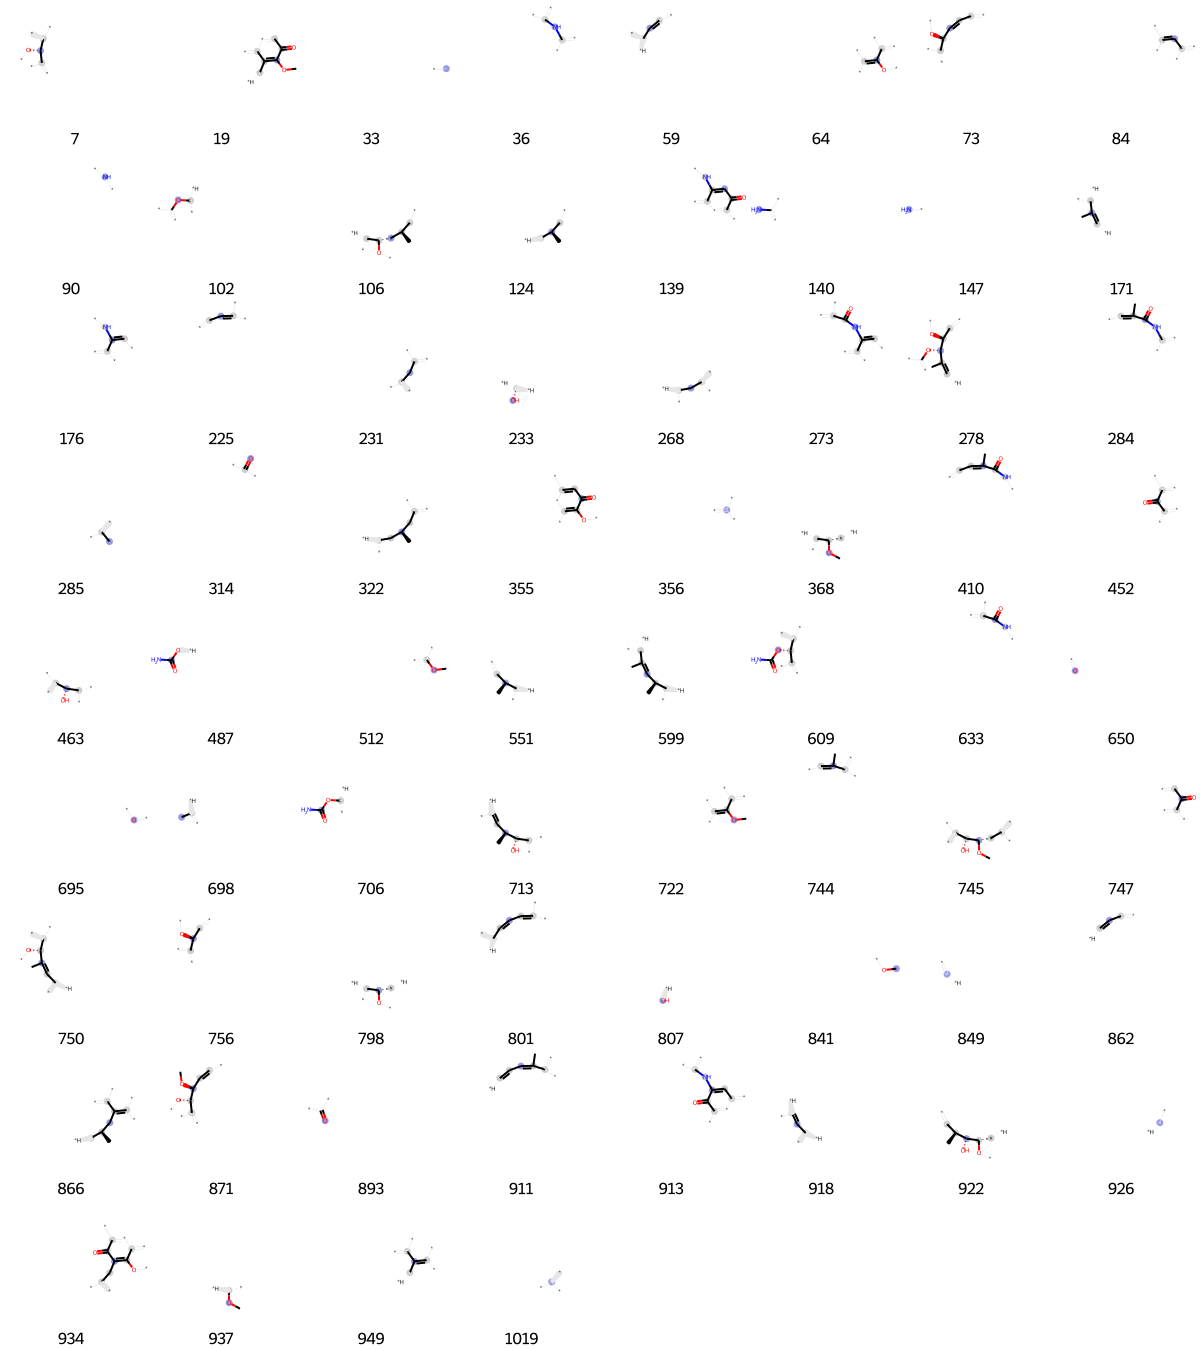

In [6680]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [6681]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[9,
 26,
 33,
 64,
 90,
 119,
 128,
 145,
 175,
 328,
 333,
 335,
 356,
 358,
 378,
 412,
 473,
 543,
 549,
 552,
 650,
 675,
 681,
 685,
 695,
 726,
 759,
 806,
 807,
 831,
 841,
 849,
 855,
 857,
 893,
 906,
 913,
 967,
 986,
 997]

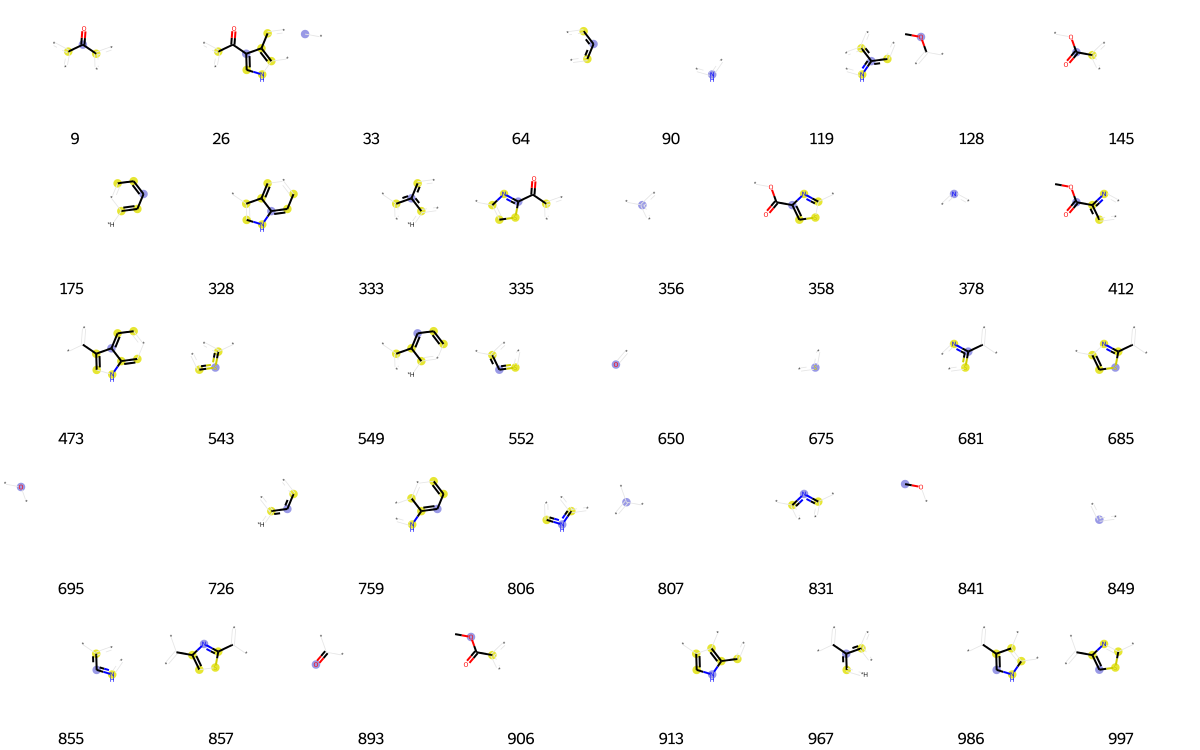

In [6682]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [6683]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[8,
 45,
 52,
 60,
 64,
 68,
 80,
 90,
 119,
 121,
 128,
 143,
 175,
 197,
 237,
 244,
 261,
 301,
 309,
 314,
 346,
 356,
 386,
 456,
 458,
 463,
 478,
 486,
 563,
 586,
 646,
 650,
 667,
 668,
 699,
 714,
 721,
 726,
 758,
 759,
 767,
 793,
 807,
 831,
 847,
 849,
 875,
 884,
 886,
 893,
 904,
 915,
 926,
 935,
 987,
 1019,
 1022]

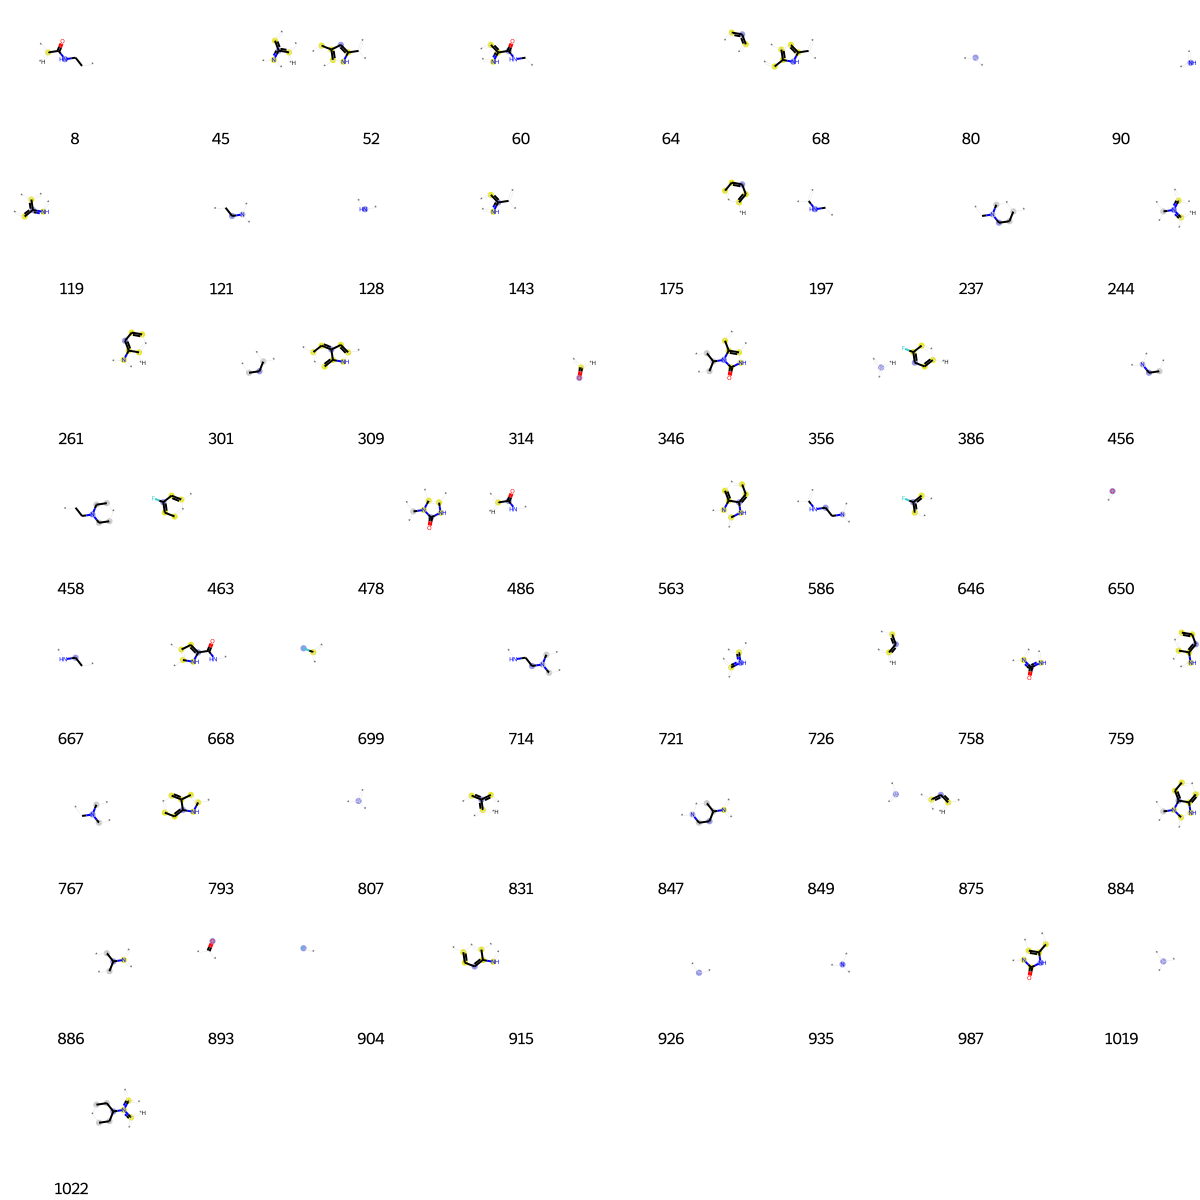

In [6684]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [6685]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[25,
 29,
 33,
 42,
 47,
 54,
 80,
 90,
 112,
 119,
 121,
 128,
 145,
 147,
 193,
 237,
 275,
 286,
 301,
 333,
 350,
 356,
 386,
 409,
 424,
 452,
 456,
 458,
 463,
 465,
 512,
 586,
 602,
 646,
 650,
 667,
 692,
 695,
 699,
 700,
 714,
 721,
 726,
 729,
 758,
 767,
 800,
 807,
 841,
 849,
 859,
 861,
 875,
 893,
 900,
 904,
 915,
 926,
 935,
 1019]

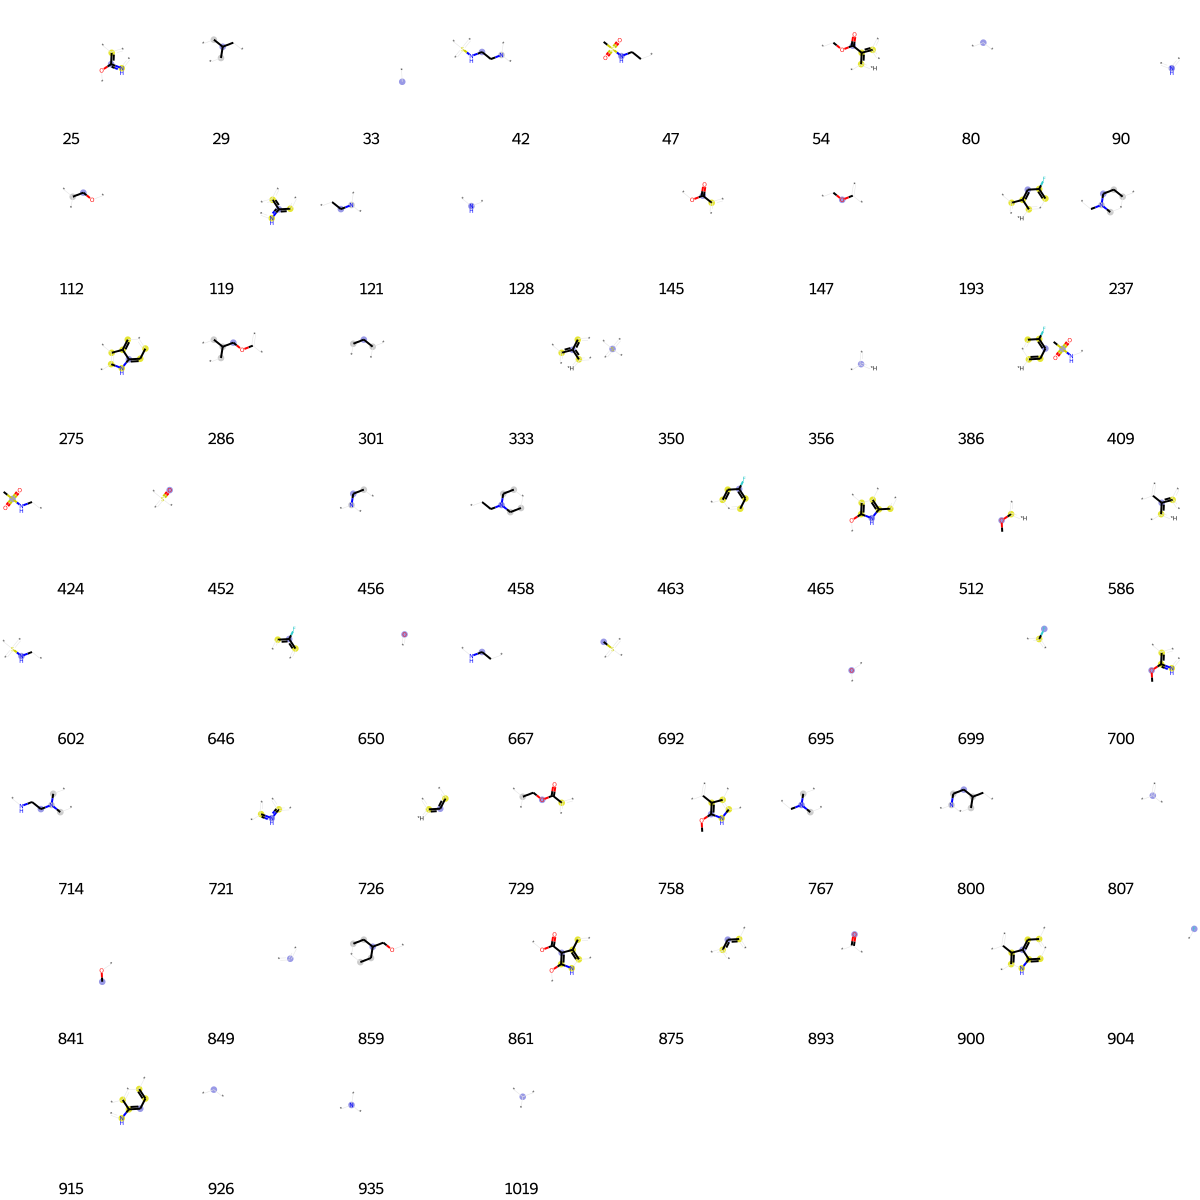

In [6686]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [6687]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 26,
 45,
 46,
 64,
 73,
 151,
 175,
 232,
 261,
 289,
 335,
 356,
 357,
 378,
 381,
 383,
 407,
 417,
 456,
 485,
 520,
 523,
 644,
 656,
 694,
 726,
 831,
 849,
 891,
 904,
 926,
 935,
 950,
 969,
 1003,
 1014]

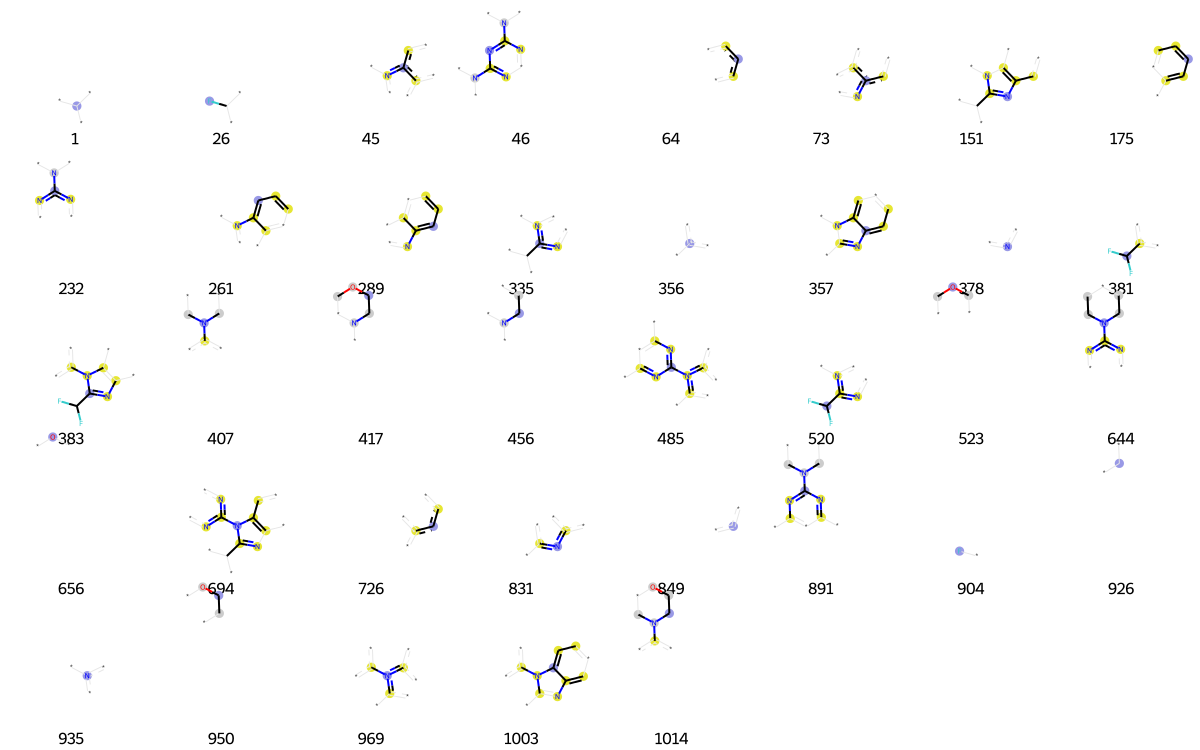

In [6688]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [6689]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[64,
 128,
 133,
 175,
 184,
 201,
 265,
 318,
 356,
 361,
 378,
 383,
 386,
 441,
 486,
 497,
 578,
 579,
 583,
 641,
 650,
 694,
 725,
 726,
 807,
 842,
 843,
 849,
 864,
 893,
 924,
 961,
 968]

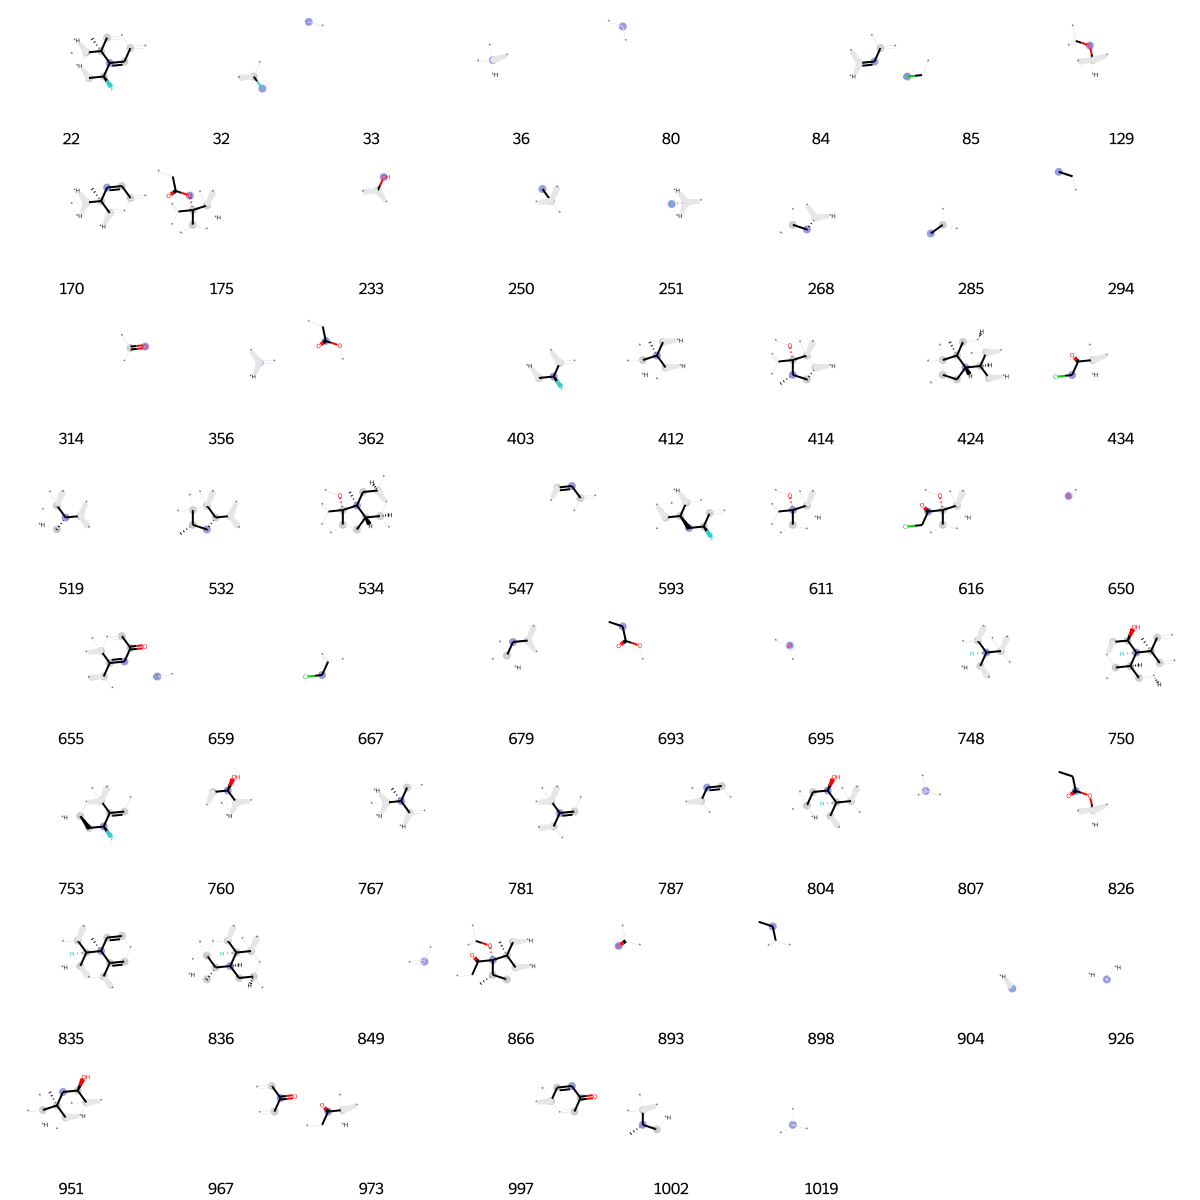

In [6690]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [6691]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[23, 33, 139, 285, 356, 378, 380, 398, 676, 831, 881]

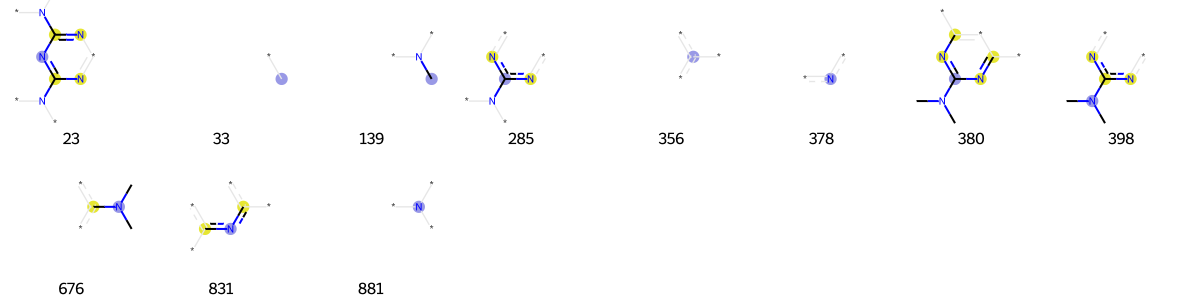

In [6692]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [6693]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[2,
 4,
 11,
 25,
 31,
 265,
 284,
 325,
 356,
 369,
 441,
 456,
 623,
 637,
 650,
 656,
 676,
 694,
 726,
 738,
 776,
 807,
 835,
 839,
 849,
 861,
 875,
 881,
 888,
 893,
 926,
 935,
 974,
 985,
 1009,
 1017]

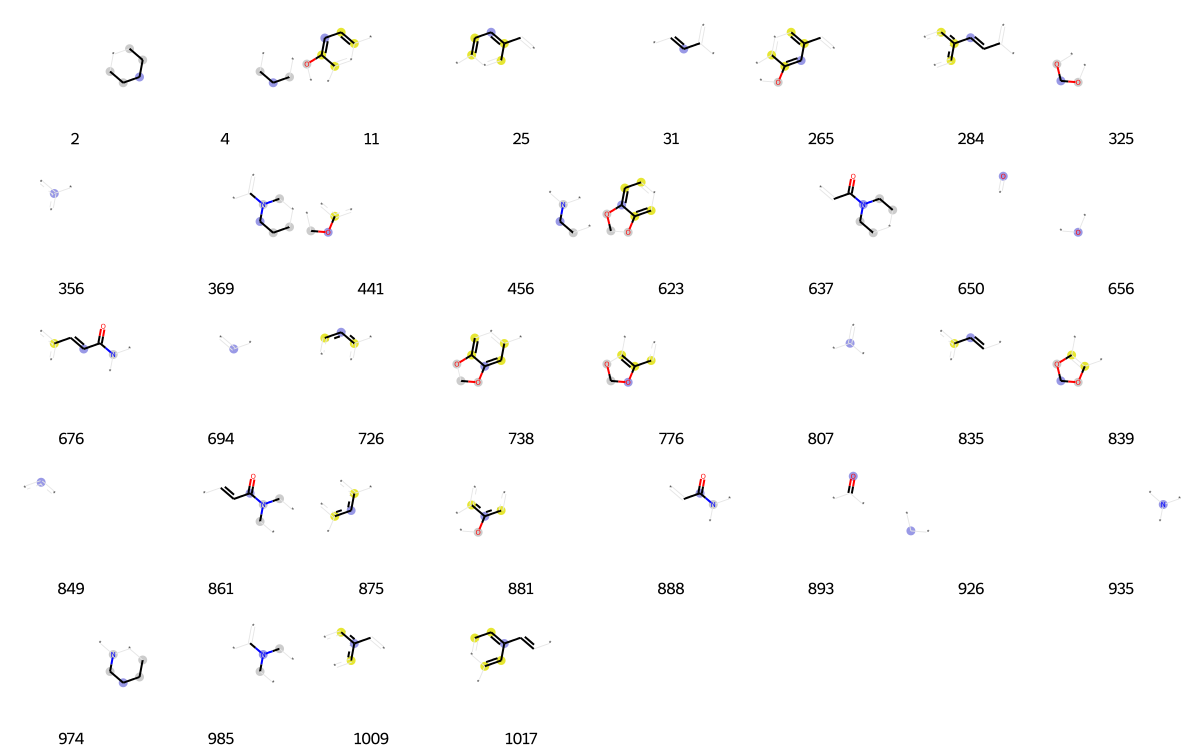

In [6694]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [6695]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[15,
 24,
 25,
 64,
 74,
 80,
 114,
 121,
 128,
 140,
 147,
 197,
 236,
 293,
 356,
 393,
 407,
 429,
 456,
 458,
 484,
 496,
 498,
 502,
 586,
 650,
 667,
 687,
 714,
 726,
 767,
 801,
 807,
 809,
 849,
 875,
 893,
 904,
 926,
 935,
 993]

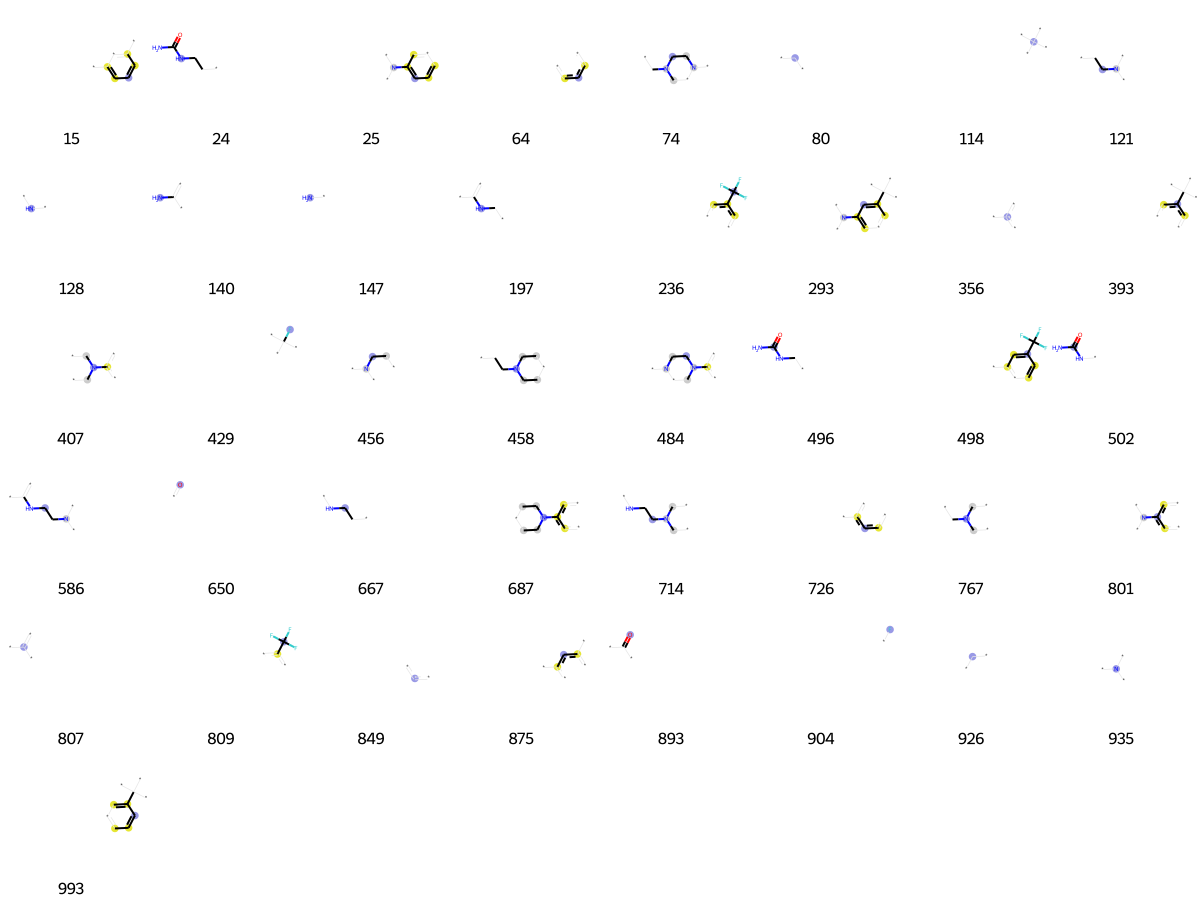

In [6696]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [6697]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 14,
 33,
 64,
 80,
 119,
 145,
 147,
 175,
 214,
 243,
 294,
 356,
 362,
 375,
 386,
 423,
 540,
 649,
 650,
 695,
 698,
 705,
 726,
 759,
 807,
 849,
 887,
 893,
 909,
 946,
 967,
 984]

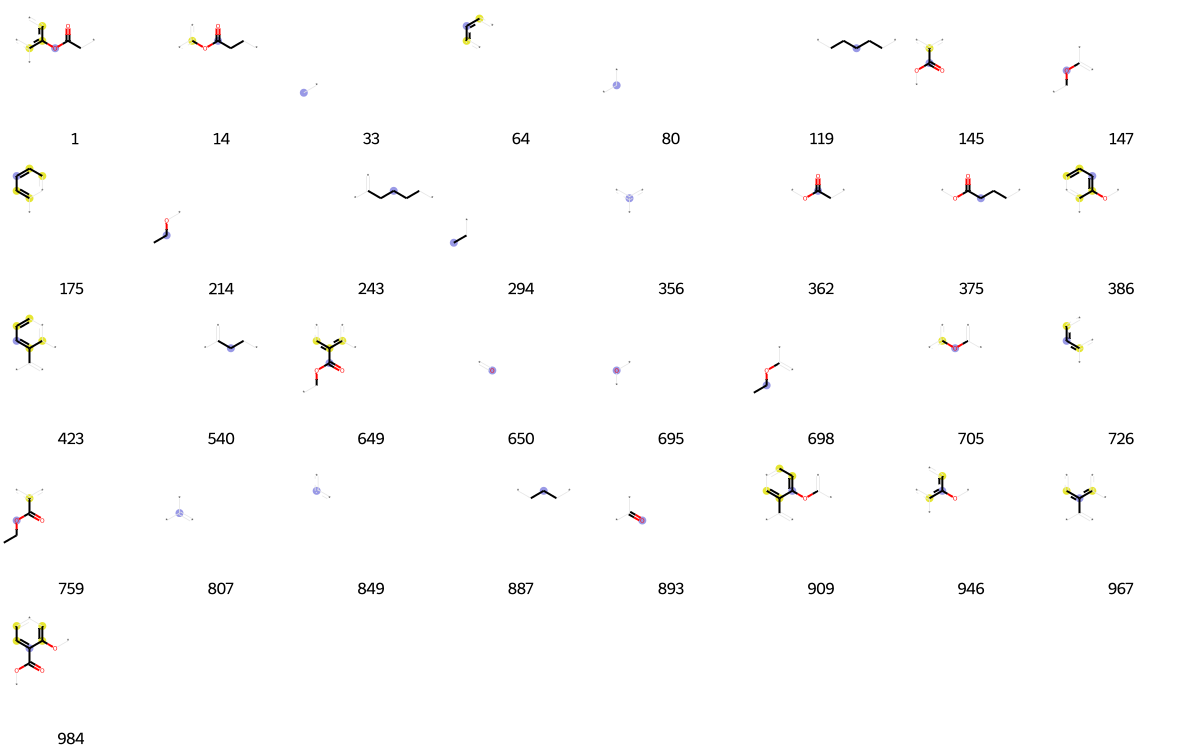

In [6698]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [6699]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[80, 232, 263, 389, 540, 650, 713, 807, 893]

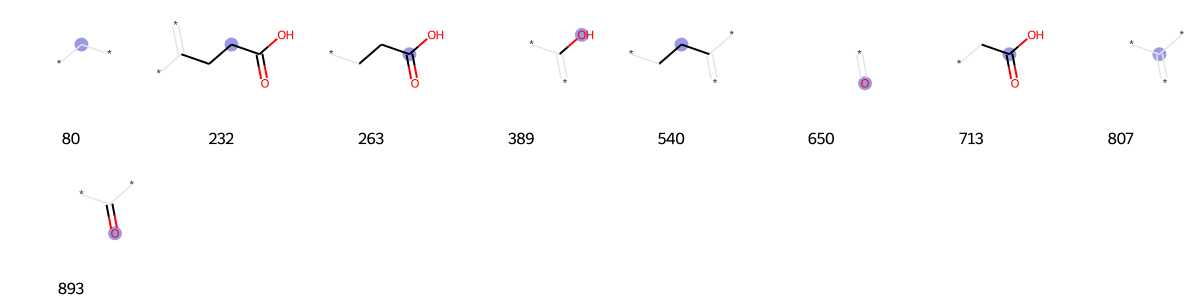

In [6700]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [6701]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[8,
 33,
 41,
 72,
 80,
 119,
 128,
 139,
 197,
 238,
 243,
 265,
 355,
 356,
 361,
 486,
 540,
 592,
 607,
 641,
 650,
 667,
 673,
 676,
 694,
 726,
 737,
 807,
 849,
 852,
 878,
 881,
 887,
 893,
 955,
 960]

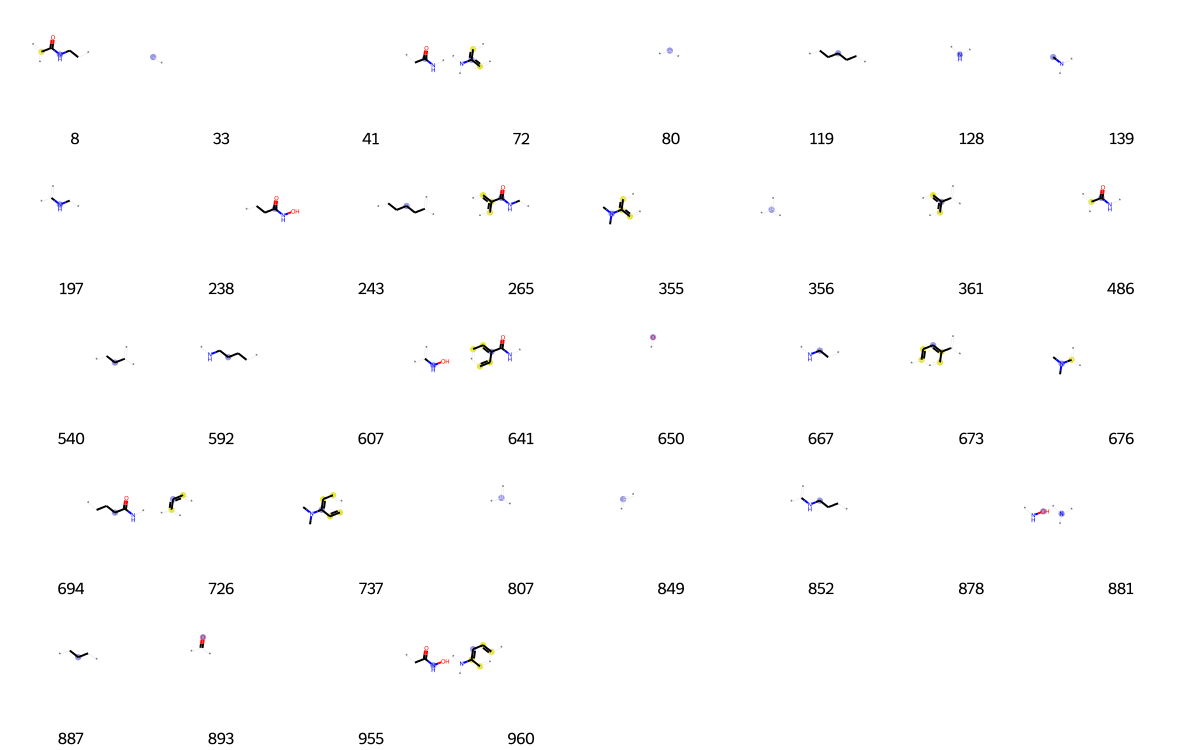

In [6702]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [6703]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[39,
 42,
 49,
 64,
 80,
 89,
 90,
 175,
 305,
 313,
 356,
 378,
 389,
 406,
 468,
 507,
 514,
 696,
 726,
 730,
 836,
 842,
 849,
 872,
 881,
 926]

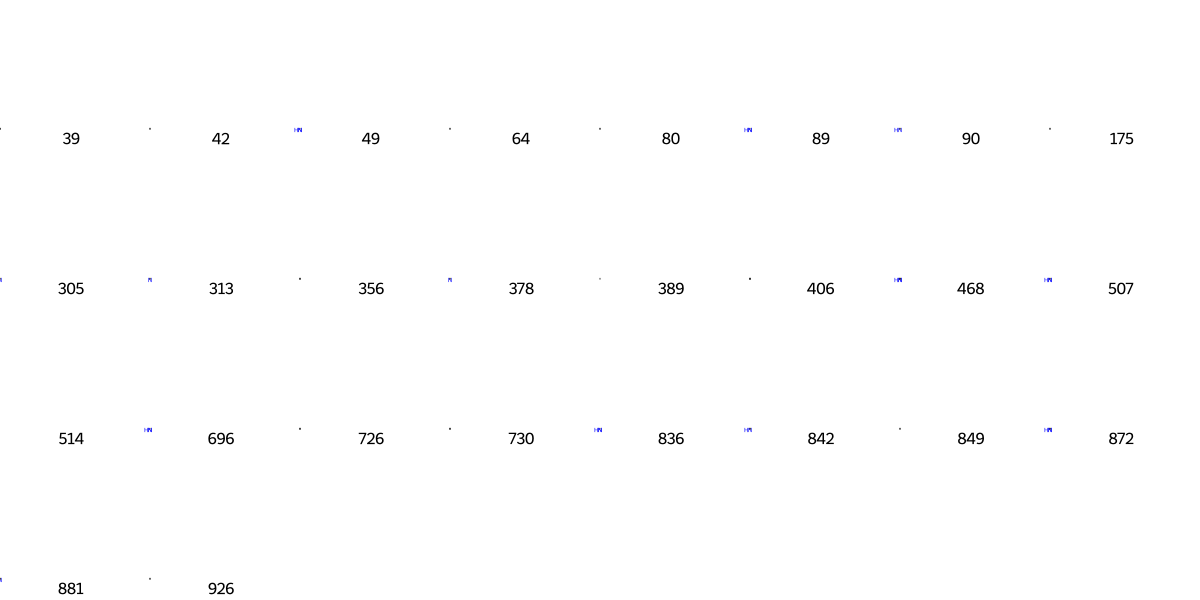

In [6704]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [6705]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[3,
 59,
 74,
 90,
 104,
 116,
 124,
 133,
 147,
 173,
 206,
 238,
 255,
 301,
 319,
 350,
 356,
 452,
 488,
 519,
 548,
 570,
 583,
 592,
 598,
 607,
 622,
 625,
 650,
 715,
 726,
 728,
 779,
 833,
 849,
 869,
 875,
 886,
 894,
 908,
 909,
 926,
 958,
 966,
 1019]

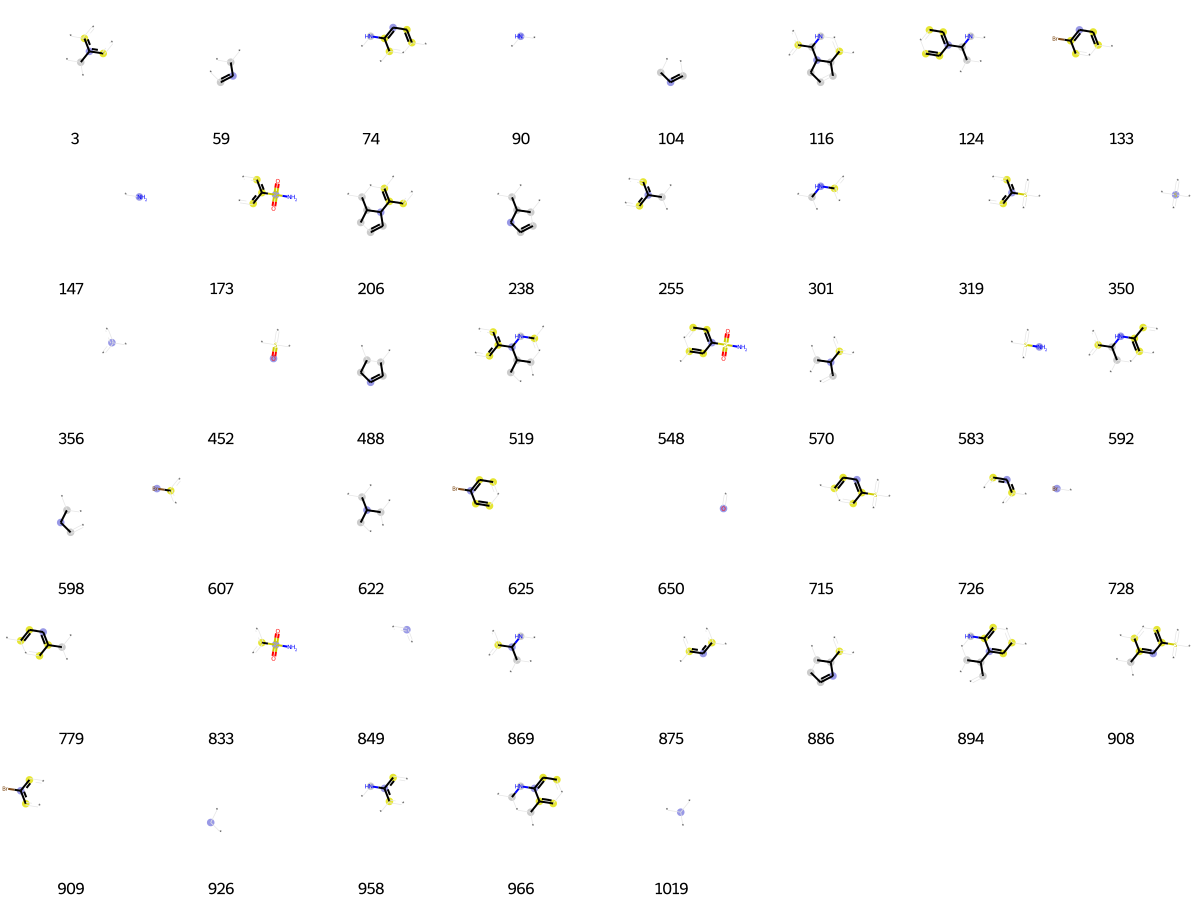

In [6706]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [6707]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 4,
 33,
 80,
 102,
 118,
 128,
 140,
 147,
 169,
 227,
 235,
 283,
 310,
 322,
 325,
 356,
 421,
 428,
 430,
 550,
 606,
 650,
 658,
 695,
 718,
 726,
 730,
 782,
 791,
 807,
 849,
 874,
 893,
 913,
 1006,
 1014]

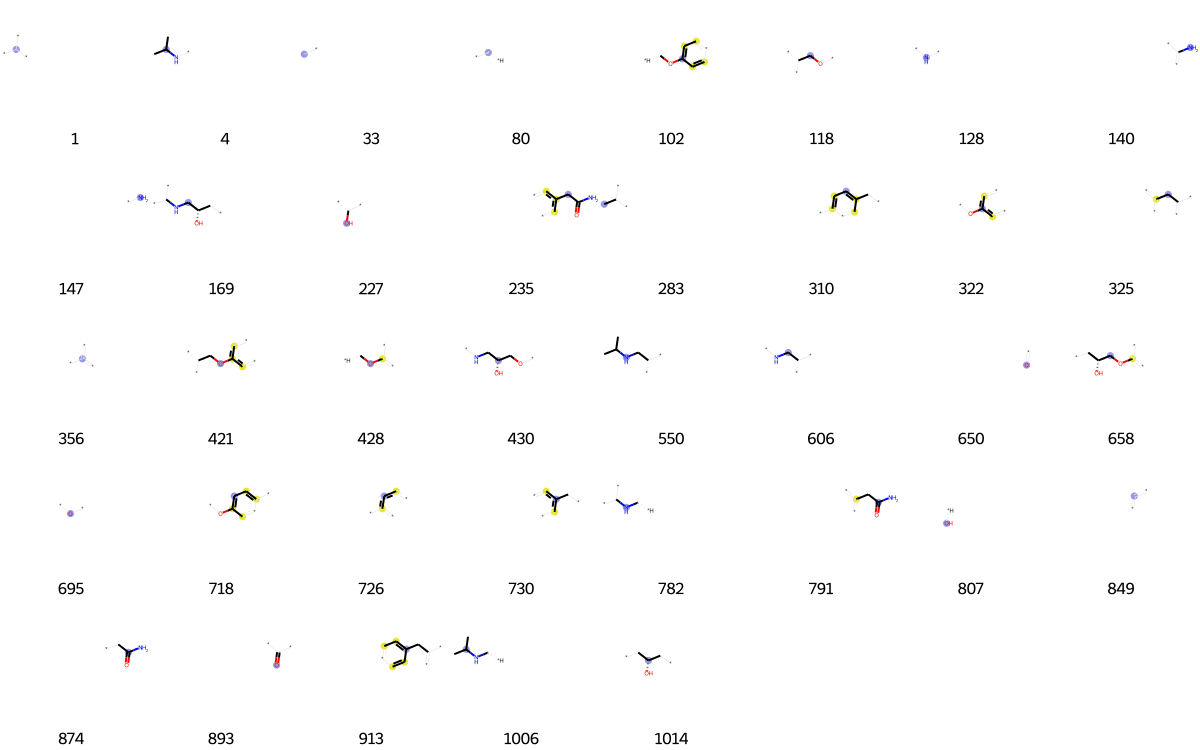

In [6708]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [6709]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 33,
 43,
 61,
 69,
 77,
 80,
 81,
 117,
 121,
 128,
 136,
 146,
 159,
 214,
 222,
 314,
 316,
 341,
 356,
 366,
 378,
 395,
 399,
 427,
 428,
 458,
 482,
 491,
 501,
 515,
 525,
 546,
 558,
 561,
 570,
 650,
 656,
 659,
 666,
 699,
 716,
 726,
 755,
 787,
 795,
 806,
 807,
 816,
 828,
 829,
 831,
 842,
 849,
 854,
 875,
 904,
 932,
 935,
 980,
 982,
 1012]

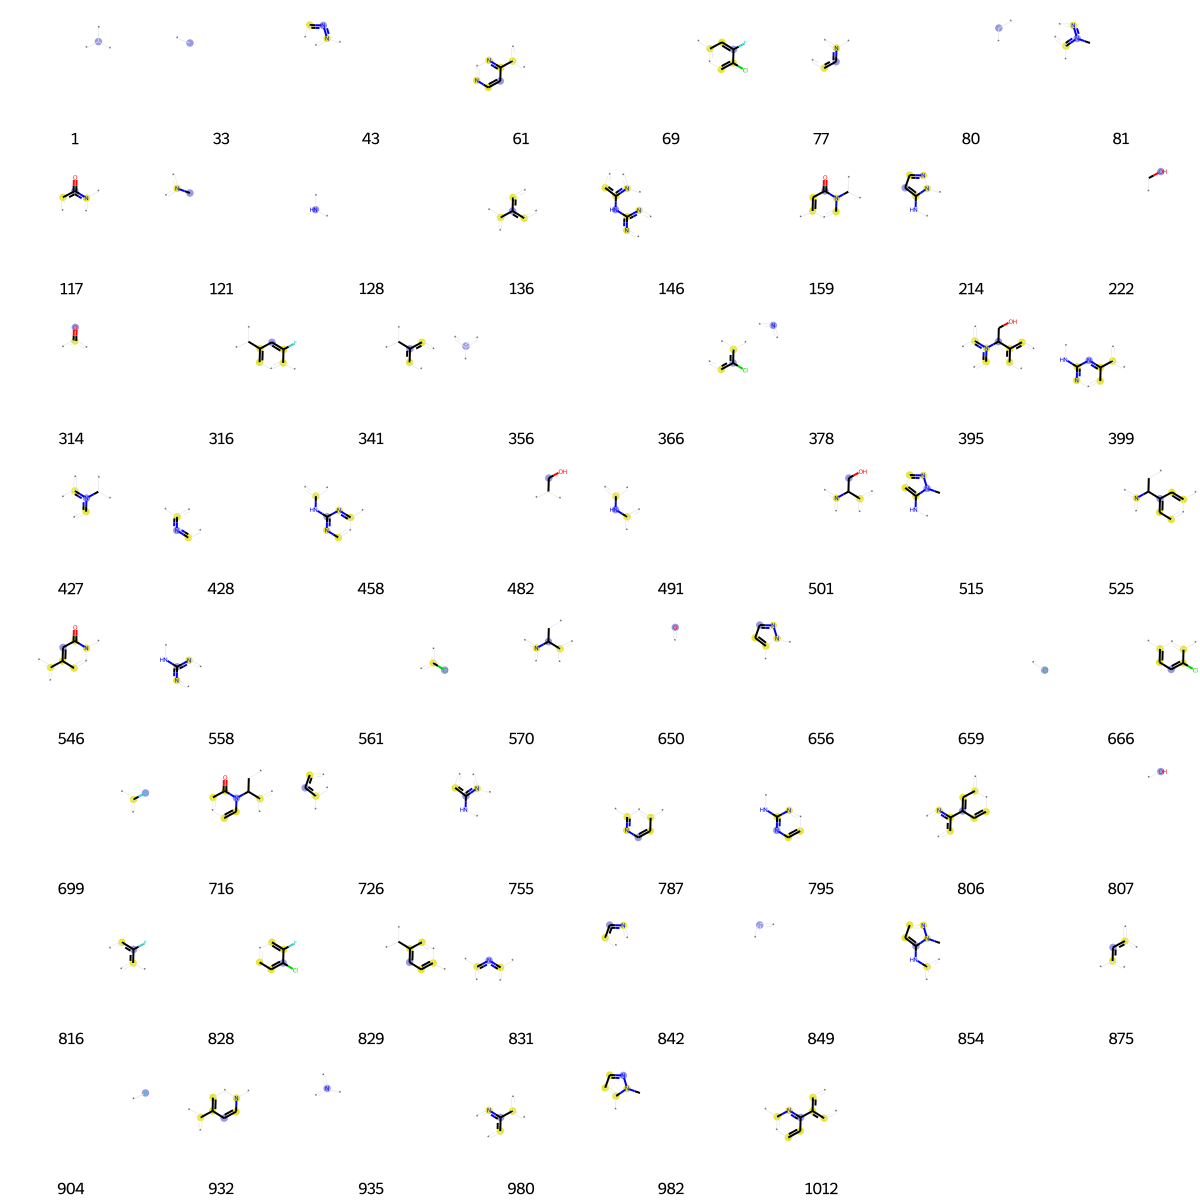

In [6710]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [6711]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[2,
 3,
 4,
 53,
 64,
 76,
 97,
 175,
 187,
 212,
 288,
 301,
 314,
 324,
 356,
 371,
 421,
 454,
 456,
 468,
 511,
 533,
 547,
 638,
 650,
 684,
 714,
 726,
 739,
 772,
 798,
 807,
 849,
 864,
 890,
 893,
 922,
 926,
 935,
 974,
 985,
 1019]

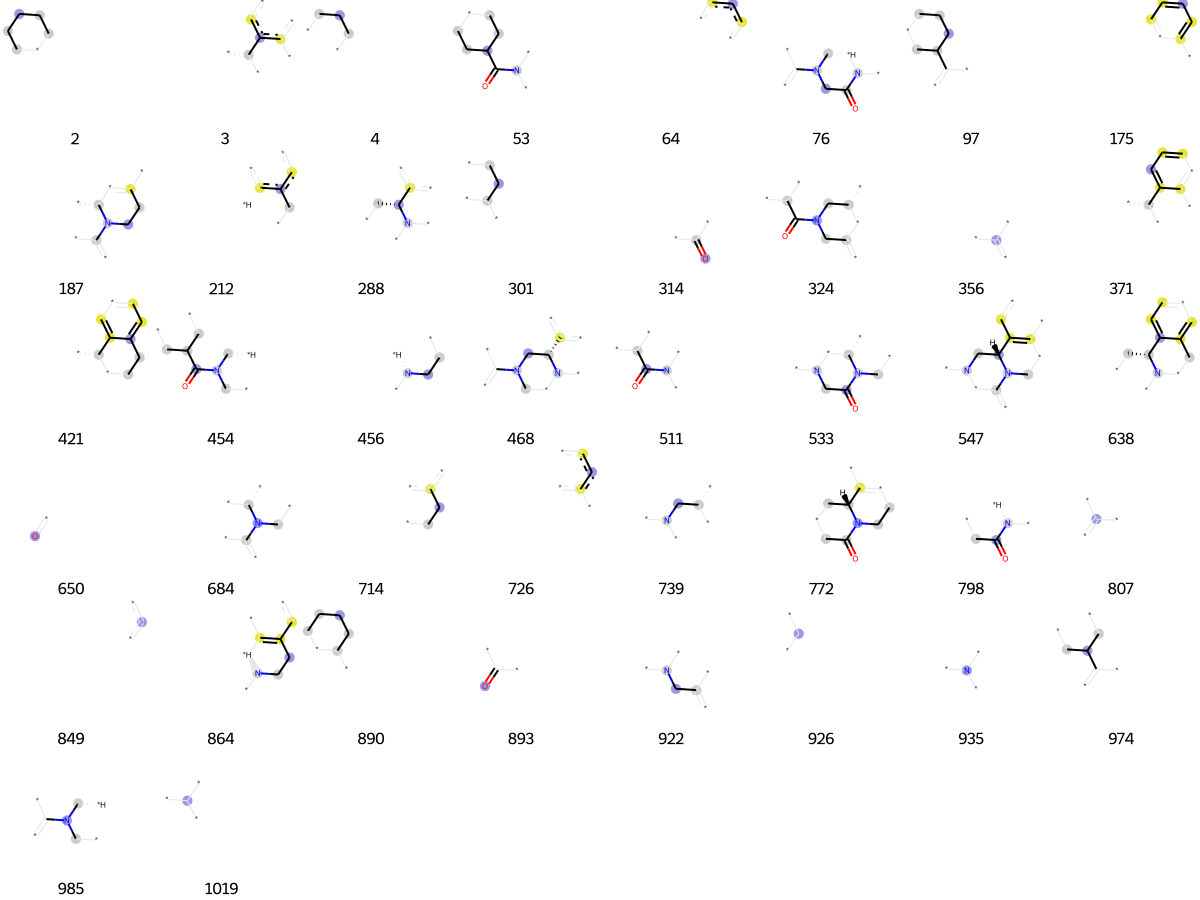

In [6712]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])